# QCTO - Workplace Module

### Analysis of Banking Transactions and Development of a Fraud Detection System
#### Done By: Nthabiseng Mokhachane

© ExploreAI 2025

---
<center>
  <img src="./Images/AI-in-Banking-Fraud-Detection.jpg" width="900" height="700"/>
</center>

## Table of Contents

<a href=#BC> 1. Background Context</a>

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Data Collection and Description</a>

<a href=#three>4. Loading Data </a>

<a href=#four>5. Data Cleaning and Filtering</a>

<a href=#five>6. Exploratory Data Analysis (EDA)</a>

<a href=#six>7. Modeling </a>

<a href=#seven>8. Evaluation and Validation</a>

<a href=#eight>9. Final Model</a>

<a href=#nine>10. Conclusion and Future Work</a>

<a href=#ten>11. References</a>

---
 <a id="BC"></a>
##  **1. Background Context**
<a href=#cont>Back to Table of Contents</a>

---

Fraud is a monumental problem in business and something, particularly in the financial industry. It is characterised as suspicious activity that intends to deceive victims for a specific gain. In the financial world, the fraudster would gain access to a victim's financial structure, enabling them to perform unwarranted transactions. This could result in the loss of huge sums of money. Additionally, such events tarnish an organisation's reputation, leading customers to belief that their valuables aren't thoroughly secured. An number of activities are classified as fraudulent, this includes the following (Kanade, 2021):

* Money laundering
* Cyberattacks
* Fraudulent banking claims
* Forged bank checks
* Identity theft

These activities impose a significant business risk that needs to be identified in time and mitigated, to prevent business loss.(Kanade, 2021) Fraud detection is an example of such mitigation measures. It refers to the process of detecting suspicious activity and preventing fraudsters from gaining access to valuable assets, such as money. This process is infamous across various industries, particularly the banking industry. The measure tends to include predictive analytics (i.e., machine learning) to categorise a transaction as fraudulent or not, along with real-time monitoring of fraudulent events. (Kanade, 2021)
<center>
  <figure>
    <img src="./Images/fraud_detection_techniques.jpg" width="500" height="500"/>
    <figcaption>Fraud Detection Techniques: Breakdown of Approaches</figcaption>
  </figure>
</center>

The aim of this project is to perform a thorough analysis of online banking transactions and develop a robust model that can identify a transction as fraulent or legitimate with absolute accurracy. The notebook presented dives into the well structured methodology to achieve this objective. The notebook is starts off with the collection and description of the dataset containing historical online transactions. This dataset will be loaded, inspected and cleaned in the next two sections of the notebook. This is to ensure absolute data quality, which will impact the reliability of any visualisations and models developed from the data. In the EDA section, the cleaned and structured dataset will undergo statistical analysis and data visualisations. This is to aid in uncovering insights regarding fraudulent transactions and demystify patterns pertaining to them. The data will then be prepared for modelling in the data preprocessing section. All text data will be transformed to numerical representations, only features that are most relevant to the target variable will be kept in the dataset and new features will be engineered from consisting features. A range of models will be prepared in the modelling section, and optimised with the best hyperparameters. These models will be validated using unseen data and evaluated using appropriate metrics to determine the final model. This is all done in the Model evaluations and validation segment. The final model will be critically evaluated and enhanced to ensure optimal performance in the last section.  



### *1.1 Problem Statement*

A banking organisation wants a system that will detect and predict fraudulent transactions using historical transactions, along with a dashboard that will provide real time monitoring of transactions.

### *1.2 Objectives*

* Perform an exploratory analysis on historical banking transactions to identify key pattern between transaction characteristics and fraudulent classification
* Develop a sophisticated supervised machine learning algorithm that detect whether a transaction is fraudulent or not
* Develop a fully functional dashboard that will visualise cumalitive transactional information and highlight incoming fraudulent transaction.

---
<a href=#one></a>
## **2. Importing Packages**
<a href=#cont>Back to Table of Contents</a>

Before we embark on the analyses and model development, it is paramount to ensure that all the packages necessary for these procedures are within the notebook. This includes essential python libraries, typically utilised for data anlysis and model contruction such as:


*   **pandas :** useful for data analysis and manipulation, providing efficient tools to load, clean, filter, transform, and analyze structured data
*   **numpy :** vital for for numerical computing, providing support for fast array operations and mathematical calculati
*   **matplotlib :** creates static and interactive data visualisations
*   **seaborn :** essential for creating advanced and appealing visualisationstlysis
*   **sklearn :** provides machine learning tools for classification,   clustering, and model evaluation.
---

### *2.1 Basic Packages*

In [166]:
import pandas as pd
import numpy as np
import string
from datetime import time
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') #Suppress raised warnings

### *2.2 Preprocessing Packages*

In [336]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

### *2.3 Model Development Packages*

In [170]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss

### *2.4 Model Evaluation Packages*

In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE

---
<a href=#two></a>
## **3. Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

---

The data utilised in this project is sourced from Kaggle (MANDAL, 2025). It consists of 51000 online banking transactions, and each record comprises of 11 features and one target variable classifying the transaction as fraudulent or legitimate based on real-world patterns. The features are as follows:

* **Transaction_ID:** The unique id for a transaction.
* **User_ID:** Unique value identifying a user performing the transaction.
* **Transaction_Amount:** The amount of money transfered in a transaction in US dollars.
* **Transaction_Type:** Describes the nature of the financial transaction.
* **Time_of_Transaction:** Specifies the time the transaction took place in 24-hour format.
* **Device_Used:** Identifies the type of device used to execute the transaction. 
* **Location:** Specifies the city the transaction was executed from.
* **Previous_Fraudulent_Transactions:** Tallies the number of times the specific user had fraudulent transactions in the past.
* **Account_Age:** The lenght of time since the user acount was opened.
* **Number_of_Transactions_Last_24H:** The amount of transactions that took place in the last 24 hours.
* **Payment_Method:** The banking method that was utilised to perform the transactions.
* **Fraudulent:** The classification of the transactions as fraudulent (1) or legitimate (0).

---
<a href=#three></a>
## **4. Loading Data**
<a href=#cont>Back to Table of Contents</a>

In this segment, the data collected for this project is loaded into a pandas DataFrame and then inspected to gain insight on the data stucture, as well as the overall quality of the data. This will inform the necessary procedures to be employed in the subsequent Data Cleaning and Filtering section.

---

### *4.1 Data Loading*

The dataset analysed in this notebook is imported from a csv file called `Fraud_Detecetion_Dataset.csv`. This file is located in the folder `Data`. Using the file path, the dataset is read into a pandas Dataframe and named `Fraud_df. The first few rows of the DataFarame are subsequently displyaed to provide a berief overview of its contents.

In [178]:
#Declare csv path
fraud_csv = "Data/Fraud_Detection_Dataset.csv"

#Load Fraud detection dataset into pandas DataFrame
fraud_df = pd.read_csv(fraud_csv)

#Display first 5 rows
fraud_df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


### *4.2 Data Inspection*

In this segment, `Fraud_df` is vigorously inspected to illuminate its overall structure and to highlight any errors, missing values, duplicates and/or data inconsistencies that need to be cleaned and filtered. This ensures that the data used for exploratory analysis and model training is of the highest quality, resulting in quality models. 

#### *4.2.1 Shape of dataset*

The shape of the dataset is displayed below to give an overview of its size.

In [183]:
#Inspecting shape of dataset
print("Shape of dataset:",fraud_df.shape)

Shape of dataset: (51000, 12)


The DataFrame is seen to contain exactly 51 000 records and 12 columns, where 11 are predictor variables and one the target. Further inspection of the variable columns is required, to ensure that they accurately represent their contents.

#### *4.2.2 Column datatypes*

The datatypes for each column are displayed below to inspect whether they are appropriate  for the column contents.

In [187]:
#Inspecting datatypes of each column
fraud_df.dtypes

Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object

All columns seem to have suitable datatypes. Columns with numerical values, such as Transaction_Amount and Account_Age, are either of the type int64 or float64. All categorical columns are of the type object, indicating that they contain strings.

#### *4.2.3 Null values*

Each column is inspected for null values. These are empty cells within the columns, and are typically a result of erronous data entry. The presence of these values could skew the data and result in distorted insights. As such, these values should be located and properly handled based on the qualities of each column. The code below sums up the number of null values for each column and displays it as a DataFrame.

In [191]:
#Inspecting null values for each columns
print("Missing values for each column:") 
pd.DataFrame(fraud_df.isnull().sum(),columns= ['null value count'])

Missing values for each column:


,null value count
Transaction_ID,0
User_ID,0
Transaction_Amount,2520
Transaction_Type,0
Time_of_Transaction,2552
Device_Used,2473
Location,2547
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


It is observed that 5 columns contain a significant number of null values. Two of the columns are numerical, the rest are categorical in nature. The value count for the columns with null values range between 2 469 and 2 552. `Time_of_Transaction` has the highest number with 2 552 null values and `Payment_Mwthod` has the lowest with 2 469. 7 of the 12 columns appear to contain zero null values. Amongst them are `Account_Age` and `Transaction_Type`.

#### *4.2.4 Duplicate rows*

The DataFrame is inspected for duplicate records. It is essential to locate such records and discard them, as their lower the integrity and quality of our dataset. Duplicate records can distort the data by inflating the frequency of values such as the mean and standard deviation. Furthermore, duplicate records can promote overfitting during model training and evaluation, thus reducing the quality of our models. The portion the duplicates make up in the entire dataset is also calculated. This is to highlight their significance in the dataset, ensuring that majority of the data is kept during the removal of the duplicate records.

In [195]:
#Inspect number of duplicate rows
dupli_row = fraud_df.duplicated().sum()
dupli_per = dupli_row/fraud_df.shape[0]*100
print("Number of duplicated rows:", dupli_row)
print("Percentage of duplicates:",round(dupli_per,2))

Number of duplicated rows: 881
Percentage of duplicates: 1.73


There are 881 duplicate records found within the DataFrame. They account for less than 2% of the data, therfore their removal from the dataset will not result in significant data loss. They will be dropped from the dataset in Data Cleaning section.

### *4.2.5 Data consistencies*

Here we have a closer look at the categorical columns, to identify any data inconsistencies that may be present and need to be clean in the next section. Since Transcation_ID is meant to contain only unique values, we expect the column to have 51 000 unique IDs. This is inspected below by counting the number of unique IDs found in the column. For the rest of the text columns, we identify the unique values within the columns since they have a small number of category values for each columns. If there is a spelling mistake or different casing for the same value, it will be indicated in the list of unique values.

In [199]:
#Count and display number of unique values for Transaction_ID column
print(f"Number of unique values for Transction_ID column:",len(fraud_df['Transaction_ID'].unique()))

Number of unique values for Transction_ID column: 50000


Out of the 51 000 records, 50 000 of them have unique Transaction IDs. This means that 1 000 IDs appear as duplicated in the dataset. Given that the data is determined to contain duplicates, 881 of the duplicates are accounted for. This leaves 119 records with duplicate transaction id, which will have to be found and properly dealt succeeding the removal of duplicate rows. 

In [201]:
#Declare columns to be inspected
columns = ['Transaction_Type','Device_Used','Location','Payment_Method']

#Find and display a list of unique values for each column
for column in columns:
    print(f"Unique values for {column} column:")
    print(fraud_df[column].unique())

Unique values for Transaction_Type column:
['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Unique values for Device_Used column:
['Tablet' 'Mobile' 'Desktop' nan 'Unknown Device']
Unique values for Location column:
['San Francisco' 'New York' nan 'Chicago' 'Boston' 'Houston' 'Miami'
 'Los Angeles' 'Seattle']
Unique values for Payment_Method column:
['Debit Card' 'Credit Card' nan 'UPI' 'Net Banking' 'Invalid Method']


Each column seems to not have any values with spelling mistakes or inconsistent casing. All values, apart from the `NaN` value, conform to sentence casing where the first letter of each word is capitalised. The different categories for each column are seem to be as follows:

* **Transaction_Type:** `ATM Withdrawal`, `Bill Payment`, `POS Payment`, `Bank Transfer` and
`'Online Purchas`.
* **Device_Used:**  `Tablet`, `Mobile`, `Desktop` and `Unknown Device`.
* **Location:**  `San Francisco`, `New York`, `Chicago`, `Boston`, `Houston`, `Miami`, `Los Angeles`and `Seattle`.
* **Payment_Method:**  `Debit Card`, `Credit Card`, `UPI`, `Net Banking` and `Invalid Method`.



Given the different categories for each column, it is appropriate to replace the `NaN` values with a new category called `Unknown`. This ensure that records are not added to either of the existing categories, which could create bais and skew the data.

---
<a href=#four></a>
## **5. Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

---

### *5.1 Handling Null Values*

The columns that contain null values are handled in this portion of the notebook. Since a number of columns with null values are categorical in nature and contain values within in a finite group of values, a suitable imputation is `Unknown`. However, the column Device_Used already contains a category value that is `Unknown Device`, hence the null values for the columns are imputated with that category value. The 2 numerical columns are imputated with the mean value of that column. To ensure the imputation worked, we check again for the number of null values for each column.

In [206]:
#Fill missing values for colums with approriate values
#numerical columns filled with the column mean
#non-numerical columns filled with 'Unknown' , column Device_Used filled with 'Unknown Device'
for column in fraud_df.columns:
    if fraud_df[column].dtype == object and column == 'Device_Used':
        fraud_df.fillna({column:'Unknown Device'},inplace=True)
    elif fraud_df[column].dtype == object:
        fraud_df.fillna({column: 'Unknown'},inplace=True)
    else:
        fraud_df.fillna({column:fraud_df[column].mean()}, inplace=True)


In [207]:
#check missing values again
print("Missing values for each column:") 
pd.DataFrame(fraud_df.isnull().sum(),columns= ['null value count'])

Missing values for each column:


,null value count
Transaction_ID,0
User_ID,0
Transaction_Amount,0
Transaction_Type,0
Time_of_Transaction,0
Device_Used,0
Location,0
Previous_Fraudulent_Transactions,0
Account_Age,0
Number_of_Transactions_Last_24H,0


There aren't any null values present for reach column. This indictes that all # imputations were successfull.

### *5.2 Handling Duplicate Rows*

The duplicate rows found during inspection are dropped from the DataFrame, keeping the original rows. This is done to prevent misleading conclusions during analysis due to bais introduced by duplicate records. An inspection is conducted again to check that all duplicated are indeed removed from the DataFrame.

In [211]:
#Drop duplicate rows
fraud_df.drop_duplicates(inplace=True)

#Check if duplicates where dropped
print("Number of duplicated rows:", fraud_df.duplicated().sum())

Number of duplicated rows: 0


### *5.3 Handling Data Inconsistencies*

Now that the duplicate recored are removed, the remaining duplicate values can be further inspected and dealt with. The number of unique transaction IDs are compared to the number or records ith in the dataset. The records that are still remaining as duplicates are displayed as a Datafeame and assesed further to identify appropriate means to handle them. 

In [214]:
#Count and display number of unique values for Transaction_ID column
print(f"Number of duplicate values for Transaction_ID column:",(fraud_df.shape[0])-len(fraud_df['Transaction_ID'].unique()))

Number of duplicate values for Transaction_ID column: 117


117 duplicate transaction IDs are found. These IDs are collected and their entire records are displayed below for analysis.

In [216]:
#Locate duplicate id
fraud_df[fraud_df['Transaction_ID'].duplicated(keep=False)].sort_values('Transaction_ID')

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
10527,T10528,2169,4277.64,POS Payment,7.0,Tablet,San Francisco,0,58,8,Unknown,0
50321,T10528,2169,4277.64,POS Payment,7.0,Tablet,San Francisco,0,58,8,Invalid Method,0
10755,T10756,4658,4483.90,ATM Withdrawal,8.0,Mobile,Boston,2,84,2,Net Banking,0
50259,T10756,4658,4483.90,ATM Withdrawal,8.0,Mobile,Boston,2,84,2,Invalid Method,0
50916,T10897,2728,1681.05,Bank Transfer,7.0,Mobile,Miami,2,45,12,UPI,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50888,T8384,2658,4647.24,Online Purchase,17.0,Desktop,Seattle,4,114,7,UPI,0
50420,T9524,2983,4593.38,Bank Transfer,19.0,Tablet,Los Angeles,3,17,4,UPI,0
9523,T9524,2983,4593.38,Bank Transfer,19.0,Tablet,Los Angeles,3,17,4,Invalid Method,0
9647,T9648,1272,1057.96,Bill Payment,14.0,Desktop,New York,1,77,13,UPI,0


From the DataFrame displayed, it is clear that the rows with duplicate IDs have the same values for all numerical columns. The difference occurs for one of the categorical columns for each duplicate transaction ID. The values for those columns where represented as null, now imputated by "Unknown" or "Unknown Device", or in some case as "Invalid Method". For this reason, it was not picked up by the duplicates search. To remedy this issue, the duplicate transaction id rows containing "Unknown", "Unknown Device" or "Invalid Method" for the differing column. The function below takes in `fraud_df`and finds the records with the duplicate transaction IDs. Then the duplicates with columns containing the selected values are identified and  dropped from the DataFrame. Thus, clearing the DataFrame from duplicates and ensuring only unique transaction IDs.

In [218]:
def drop_any_unknown_duplicates(df):
    """
    Cleans DataFrame by removing rows with duplicate transaction IDs
    
    Arg:
        df (DataFrame): The DataFrame duplicate transaction IDs.
        
    Return:
        cleaned_df: The DataFrame with only unique transaction IDs.

    """
    # Identify all rows with duplicate transaction IDs
    duplicates_df = df[df['Transaction_ID'].duplicated(keep=False)].copy()

    # Define conditions for "unknown" or "invalid" values
    conditions = {
        'Unknown': ['Device_Used', 'Location', 'Payment_Method', 'Transaction_Type'],
        'Unknown Device': ['Device_Used'],
        'Invalid Method': ['Payment_Method']
    }

    # Create a mask for rows with any "unknown" or "invalid" values
    drop_mask = False
    for value, columns in conditions.items():
        drop_mask |= duplicates_df[columns].isin([value]).any(axis=1)

    # Get indices of duplicates to drop (those with "unknown" or "invalid" values)
    drop_indices = duplicates_df[drop_mask].index

    # Drop those rows from the original DataFrame
    cleaned_df = df.drop(drop_indices)

    # For remaining duplicates, keep the first occurrence
    cleaned_df = cleaned_df.drop_duplicates(subset=['Transaction_ID'], keep='first')

    return cleaned_df

In [219]:
#Apply drop_any_unknown_duplicates function
fraud_df = drop_any_unknown_duplicates(fraud_df)

#Check if all duplicates were removed
print(f"Number of duplicate values for Transaction_ID column:",(fraud_df.shape[0])-len(fraud_df['Transaction_ID'].unique()))

#Final shape of DataFrame
print("Shape of fraud_df:", fraud_df.shape)

Number of duplicate values for Transaction_ID column: 0
Shape of fraud_df: (49990, 12)


The Transaction_ID column now contains unique values only. The dataFrame now has 49990 records.

### *5.4 Handling Time of Transaction Datatype*

In [222]:
# Function to extract decimal part
def get_decimal(value):
    """"
    Extracts the decimal part of the folat value.
    
    Arg:
        value (float): Value with decimals

    Return:
         decimal_part (float): The decimal part of the value with out the interger part
    """
    #Extracts the decimap part of the value
    decimal_part = value - int(value)
    
    return decimal_part

In [223]:
df = fraud_df
df['Decimal_Part'] = df['Time_of_Transaction'].apply(get_decimal)

# Filter for rows with non-zero decimal parts and sort by decimal part descending
decimal_df = df[df['Decimal_Part'] > 0][['Transaction_ID', 'Time_of_Transaction', 'Decimal_Part','Fraudulent']]
sorted_decimal_df = decimal_df.sort_values(by='Decimal_Part', ascending=False)

#Display rows
sorted_decimal_df

,Transaction_ID,Time_of_Transaction,Decimal_Part,Fraudulent
2,T3,11.4884,0.4884,0
33960,T33961,11.4884,0.4884,0
33834,T33835,11.4884,0.4884,0
33840,T33841,11.4884,0.4884,0
33865,T33866,11.4884,0.4884,0
...,...,...,...,...
16705,T16706,11.4884,0.4884,0
16775,T16776,11.4884,0.4884,0
16780,T16781,11.4884,0.4884,0
16830,T16831,11.4884,0.4884,0


All transaction times that contain decimals are 11.4884 and they seem to add no significance in whether the transaction is fraudulent or legimatimate. Hence, this can be attributed to erronous data entry and therefore regidtered as noise. To remedy this, these decimals will be discard to conform to the format of majority of the data in this column. Thus, Time_of_Transaction will only display the hour in which the transaction took place. The function below discards the decimal number found in any row of the column and converts the remaining value into a datetime.time format. This ensures that the column is of the datatime datatype.

In [225]:
def convert_to_time(value):
    """
    Converts float value into time datatype.

    Arg:
        value (float): Value with decimal points

    Return:
        time (time): The value represented in hours:minutes:seconds
    """

    #Convert decimal value to int to discard decimals
    hour_int = int(value)

    #Convert hour into time format
    if 0 <= hour_int <= 23:
        Time = time(hour=hour_int, minute=0, second=0)
        
    return Time

In [226]:
#Apply convert to time to Time_of_Transaction column
fraud_df['Time_of_Transaction'] = fraud_df['Time_of_Transaction'].apply(convert_to_time)

#Display first five rows
fraud_df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent,Decimal_Part
0,T1,4174,1292.76,ATM Withdrawal,16:00:00,Tablet,San Francisco,0,119,13,Debit Card,0,0.0000
1,T2,4507,1554.58,ATM Withdrawal,13:00:00,Mobile,New York,4,79,3,Credit Card,0,0.0000
2,T3,1860,2395.02,ATM Withdrawal,11:00:00,Mobile,Unknown,3,115,9,Unknown,0,0.4884
3,T4,2294,100.10,Bill Payment,15:00:00,Desktop,Chicago,4,3,4,UPI,0,0.0000
4,T5,2130,1490.50,POS Payment,19:00:00,Mobile,San Francisco,2,57,7,Credit Card,0,0.0000


In [227]:
#Inspect Datatype
fraud_df['Time_of_Transaction'].dtype

dtype('O')

The time is now displayed in the format `hour:minute:second` as is standard for time. Furthermore, the column is now represented as the object datatype, which is typical of columns of a datatime.time type.

### *5.4 Text Cleaning*

The text data contained in numerical columns are all converted to lowercase format. This is to standardise the text, which makes further analysis simpler.

In [231]:
#convert all text columns to lowercase
for column in fraud_df.columns:
    if fraud_df[column].dtype == object and column not in ['Transaction_ID','Time_of_Transaction']:
        fraud_df[column]= fraud_df[column].apply(lambda x: x.lower())

#Display first 5 rows
fraud_df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent,Decimal_Part
0,T1,4174,1292.76,atm withdrawal,16:00:00,tablet,san francisco,0,119,13,debit card,0,0.0000
1,T2,4507,1554.58,atm withdrawal,13:00:00,mobile,new york,4,79,3,credit card,0,0.0000
2,T3,1860,2395.02,atm withdrawal,11:00:00,mobile,unknown,3,115,9,unknown,0,0.4884
3,T4,2294,100.10,bill payment,15:00:00,desktop,chicago,4,3,4,upi,0,0.0000
4,T5,2130,1490.50,pos payment,19:00:00,mobile,san francisco,2,57,7,credit card,0,0.0000


All categorical columns appear to be in lowercase as adjusted. The dataset is now ready to undergo exploratory data analysis to uncover any patterns regarding fraudulent transactions.

---
<a href=#five></a>
## **6. Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

---


### *6.1 Statistical Summary*

A 5-number summary is generated for legitimate and fraudulent transactions, along with the count, mean and standard deviation of numerical columns. It is a statistical tool that describes the distribution of numerical features and aids with the comprehension of their spread, central tendency and variability. It consists of the following points:

* min: The minimal value of the feature in the dataset
* 25%: The 25th percentile value for the feature, known as the 1st quartile.
* 50%: The median value for the feature, known as the 2nd quartile.
* 75%: The 75th percentile value for the feature, known as the 3rd quartile.
* max: the maximum value of the feature.

Although User_ID and Fraudulent are numerical columns, they are excluded from this analysis. The two columns do not represent a meaningful numerical quantity that can be analysed for trends and distributions. Therefore, a new DataFrame is generated with the two columns removed and a statistical summary is generated for it. Moreover, columns/features with an object datatype are not removed from the Dataframe beacusee `describe()` automatically computes a summary soley based on numerical features.


#### *6.1.1 Legitimate transactions*

The statistical summary for legitimate transactions is computed below. First, a DataFrame containing only legitimate transactions is constructed from `fraud_df`. Then `describe()` is used to generate the summary.

In [238]:
# Creating Dataframe with legitimate transactions
legitimate_df = fraud_df[fraud_df['Fraudulent']==0]

#Removing irrelelant features
legit_stat_df = legitimate_df.drop(['User_ID','Fraudulent'],axis=1)

#statistical summary of DataFrame
legit_stat_df.describe()


,Transaction_Amount,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Decimal_Part
count,47531.000000,47531.000000,47531.000000,47531.000000,47531.000000
mean,2991.687096,1.996276,59.973807,7.500326,0.024332
std,4896.506841,1.416490,34.385929,4.020358,0.106264
min,5.030000,0.000000,1.000000,1.000000,0.000000
25%,1334.515000,1.000000,30.000000,4.000000,0.000000
50%,2655.130000,2.000000,60.000000,7.000000,0.000000
75%,3725.445000,3.000000,90.000000,11.000000,0.000000
max,49997.800000,4.000000,119.000000,14.000000,0.488400


From this summary, the average transaction amount is seen to be `$2 991.69`  for legitimate transaction. However, it has a high standard deviation of `$4 896.51`. This indicates that there is a large viariabiilty around the mean transaction amount. It is interesting to observe that 75% of all transaction have an amount lower than `$3 725.45`. Meaning, a lower number of users transfer large amounts, as is common in the real world. It is also deduced that on average, a user's account would have had at least 2 previous fraudulent transactions. Minority of the accounts experience fraud more than 3 times. A large number of the accounts seem to be relatively young, with 75% of them being active for less than 90 days. This suggests that the given dataset is comprises of fairly recent accounts. The large standard deviation suggests that the values are fairly spread out about the mean, with ages varying vastly for most accounts. Given the number of transactions for the last 24 hours, it is interesting to see that only 25% of the accounts have less than 4 transactions a day. However, this can be attributed to everyday expenses and typical transactions, given that such transaction accounts are granted to individuals to have easy access to their funds.

#### *6.1.2 Fraudulent transactions*

The statistical summary for fraudulent transactions is generated below using `describe()`. The DataFrame,`fraud_df`, is initially filtered to contain only fraudulent transactions and assigned to a new variable to avoid overwritting the original dataset. This DataFrame is used to compute the summary.

In [242]:
# Creating Dataframe with Fraudulent transactions
fraudulent_df = fraud_df[fraud_df['Fraudulent']==1]

#Removing irrelelant features
fraud_stat_df = fraudulent_df.drop(['User_ID','Fraudulent'],axis=1)

#statistical summary of DataFrame
fraud_stat_df.describe()

,Transaction_Amount,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Decimal_Part
count,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000
mean,3102.578078,1.999593,60.863359,7.426190,0.026019
std,5483.450071,1.399320,34.585880,4.005862,0.109707
min,14.310000,0.000000,1.000000,1.000000,0.000000
25%,1307.380000,1.000000,32.000000,4.000000,0.000000
50%,2661.260000,2.000000,62.000000,7.000000,0.000000
75%,3659.030000,3.000000,91.000000,11.000000,0.000000
max,49997.800000,4.000000,119.000000,14.000000,0.488400


The summary for fraudulent treansaction is seen to be eerily similar to that of legitimate transactions, with slight variations withe the mean and standard deviation. This suggests that fraudulent transactions share  similar patterns as legitimate ones. This could be a result of fraudsters assimilating their transactions to avoid detection as much as possible. Although, all numerical features have a slighly higher value for the mean and standard deviation, apart from Number of transactions in the last 24Hours. Which ahs a slightly lower number for each. Fraudulent transactions seem to have a slightly higher transaction amount for atleast 75% of the accounts. This relationship is seen for Account age as well, with all values of the 5 point summary being at least two unuts higher. This could potentially suggest that these two features are one of the biggest indicators of whether a transaction is legitimate or not. To better compare summary of all features, a box plot analysis is conducted in the next section.

### *6.2 Box Plot Analysis*

The 5 number summary discussed above is visualised for each feature for legitimate and fraudulent cases, using a box plot. The box plot indicate the min, max and the three quatiles, along with outliers. For each features, the box plot for the legitimate and fraudulent cases are visualised on the same set of axis to enhance visibility and comparison between the two cases. The aim of this analysis is to highlight any differences between the wo cases to determine patterns for fraudulent cases. 

#### *6.2.1 Account age, previous fraudulent transactions and number of transactions in the last 24h*

The function below plots the box plots for account age, previous fraudulent transactions and number of transactions on the same subplot. This is done since the three have smaller range of values making them easily descipherable together.

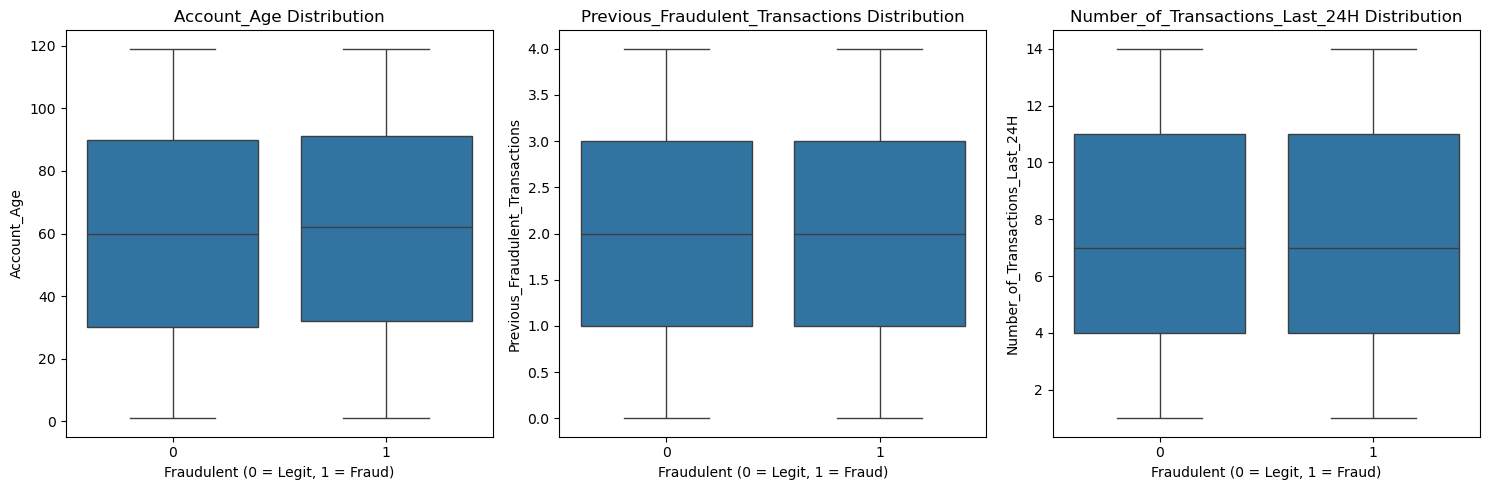

In [248]:
#Box plot of fraudulent and Legitimate transactions for
# Account Age, Previous Fraudulent transactions and number of transactions in the last 24h

# Features to plot
features = [ 'Account_Age','Previous_Fraudulent_Transactions', 'Number_of_Transactions_Last_24H']

# Set up the plot
plt.figure(figsize=(15, 5))

# Create a boxplot for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Fraudulent', y=feature, data=fraud_df)
    plt.title(f'{feature} Distribution')
    plt.xlabel('Fraudulent (0 = Legit, 1 = Fraud)')
    plt.ylabel(feature)


plt.tight_layout()
plt.show()



The distribution for number of transactions is slightly skewed to the right, meaning a large number of accounts perform 7 or more transactions a day. this distribution is seen for both legitimate and fraudulent transactions. This slightly suggests that the feature would be a poor determinant on whether the transaction is fraudulent or not, the same can be said for previous fraudulent transactions. The feature has nearly identical plots for both fraudulent and legitimate cases. Hoowever, the distribution for both plots are normal, with an equal number of accounts on either side of the median. The plots for the account age are the ones with slightly visibile differences. The fraudulent box plot has a slightly higher account age for 50% of the accounts deemed fraudulent. Additionally, the box has a higher median than the legitimate plot. This could suggest that the feature is a key indicator of whether the account is fraudulent, albeit weak. 

#### *6.2.2 Transaction amount*

The box plot for transaction amount is plotted seperately, to allow us to the plot with ouliers and without ouliers. This enables us to zoom in on the distribution of transaction amount, and identify any differences between the two cases.

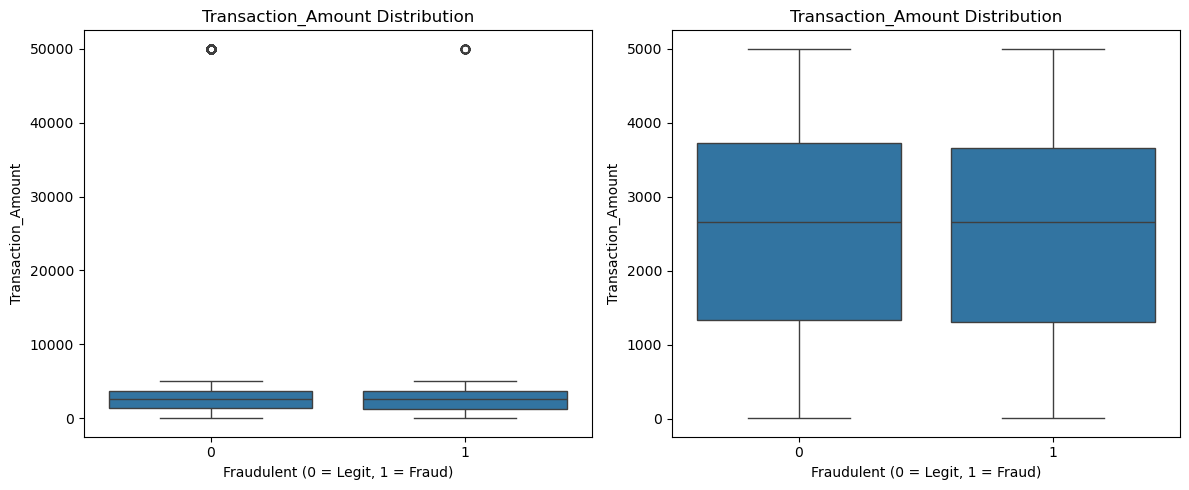

In [252]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2,1)
sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=fraud_df)
plt.title('Transaction_Amount Distribution')
plt.xlabel('Fraudulent (0 = Legit, 1 = Fraud)')
plt.ylabel('Transaction_Amount')

plt.subplot(1, 2, 2)
sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=fraud_df, showfliers=False)
plt.title('Transaction_Amount Distribution')
plt.xlabel('Fraudulent (0 = Legit, 1 = Fraud)')
plt.ylabel('Transaction_Amount')

plt.tight_layout()
plt.show()

Both plots have an outlier of  nearly `$50 000`, this is odd as one would expect to find such an oulier only for fraudulent cases. This means that the dataset is broad to include account users that occasionally transfer large funds. The box plots excluding the outliers, demonstrate a normal distribution.

### *6.3 Distribution of Transaction type and Device used*

(intro)

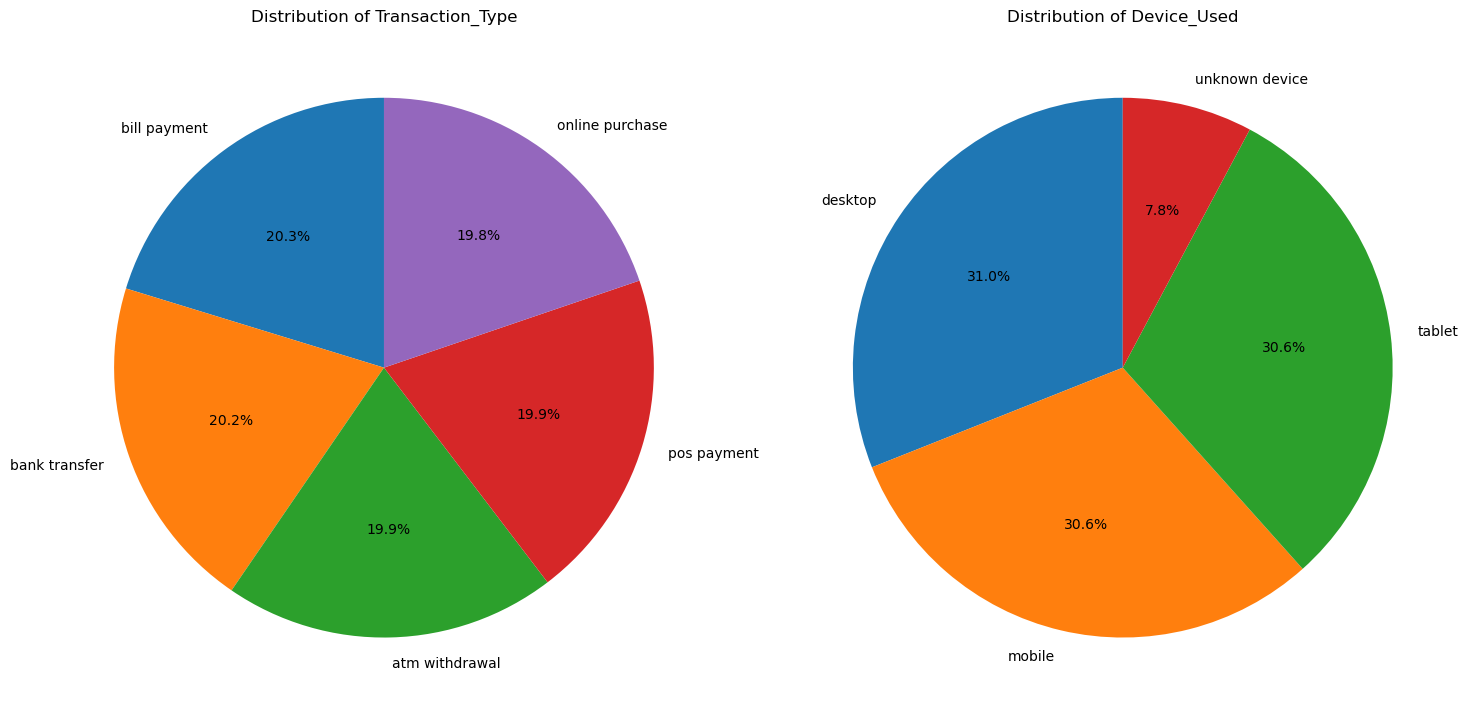

In [256]:
text_column =['Transaction_Type', 'Device_Used']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily index

for i, column in enumerate(text_column):
    # Calculate counts for the current column
    column_counts = fraud_df[column].value_counts()
    
    # Create pie chart
    axes[i].pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

A larger portion of transactions are Bill Payment and Bank Transfer, covering `40.5 %` of all transactions combined. However all transaction types are nearly equally porportionate with less than 1% difference. The data is fairly balance for all types. For Device used, majority of transactopns occur on Desktop, Mobile and Tablet for a portion of `31 %`, `30.6 %` and `30.5 %` respectively. This smallest portion is seen for unkown device with `7.9 %`.

### *6.4 Distribution of Location and Payment Method*

(intro)

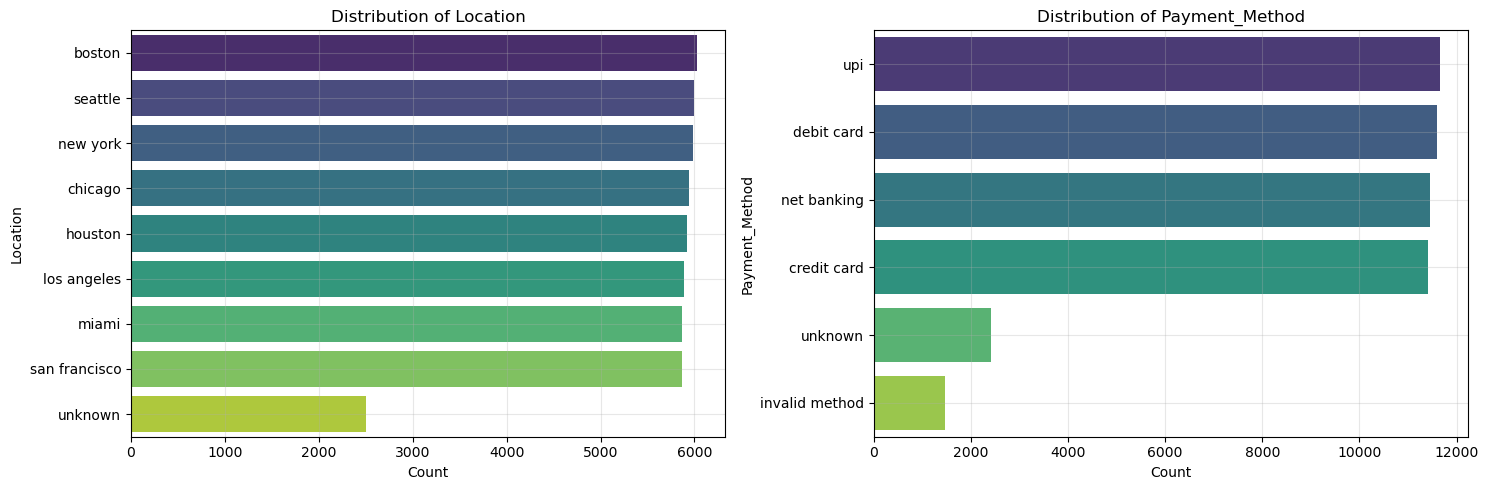

In [260]:
text_column =['Location','Payment_Method']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes = axes.flatten()  # Flatten to easily index

for i,column in enumerate(text_column):
    column_counts = fraud_df[column].value_counts().reset_index()
    column_counts.columns = [column, 'Count']
    sns.barplot(data=column_counts,x='Count', y=column,ax=axes[i],hue=column, legend=False, palette='viridis')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show() 

Majority of financial transactions occur in Boston, New York and Seattle. Only a small number of transaction have an unknown location, while most transactions are nearly evenly spread out to all loacations. For payment method, the most popular payment method is seen to be UPI. However, majority of the transactions are slightly evenly spread across Debit Card, Net banking and Credit Card. A very low number of accounts fall under Unknown and Invalid Method.

### *6.5 Target Variable Analysis*

The target variable is assessed to identify any class imbalances. To achieve this, a bar and pie chart is constructed to demonstrate the proportion of fraudulent and legitimate transactions in the dataset.

In [264]:
def target_class(df):
    plot_fraud_df = df
    plot_fraud_df['Fraud_Status'] = plot_fraud_df['Fraudulent'].map({0: 'Legitimate', 1: 'Fraudulent'})
    
    colors = ['#00C4B4', '#1E88E5', '#4DD0E1', '#008E7A', '#64B5F6']
    palette = {'Legitimate': '#1E88E5', 'Fraudulent': '#00C4B4'}
    background_color = '#1C2526'
    text_color = '#FFFFFF'
    grid_color = '#B0BEC5'
    
    # Setting the canvas for the figures
    fig, axes = plt.subplots(1, 2, figsize=(12, 6),facecolor=background_color)
    
    # Plotting the frequency (count) chart for train_df
    order = plot_fraud_df['Fraud_Status'].value_counts().index
    sns.countplot(x=plot_fraud_df['Fraud_Status'], hue=plot_fraud_df['Fraud_Status'], palette=palette,order=order, ax=axes[0])
    axes[0].set_xlabel('Fraud status', color=text_color)
    axes[0].set_ylabel('Count',color=text_color)
    axes[0].set_title('Distribution of Fraud Status',color=text_color, fontsize=14)
    axes[0].tick_params(axis='both', colors=text_color)
    axes[0].set_facecolor(background_color)
    axes[0].grid(True, color=grid_color, linestyle='--', alpha=0.5, zorder=0)
    axes[0].set_axisbelow(True)
    for index, data in enumerate(plot_fraud_df['Fraud_Status'].value_counts()):
        axes[0].text(x=index, y=data+29, s=f'{data}', ha='center',color=text_color)
    
    # Plotting the pie chart showing the % composition of each category for the train_df
    freq_train = plot_fraud_df['Fraud_Status'].value_counts().sort_values(ascending=True)
    
    axes[1].pie(freq_train, labels=freq_train.index,colors=colors, autopct='%1.0f%%', startangle=90,textprops={'color': text_color})
    axes[1].set_title('Percentage Composition', color=text_color, fontsize=14)
    
    fig.subplots_adjust(left=0.1, right=1, bottom=0.2, top=0.8, wspace=0.4)

    return fig

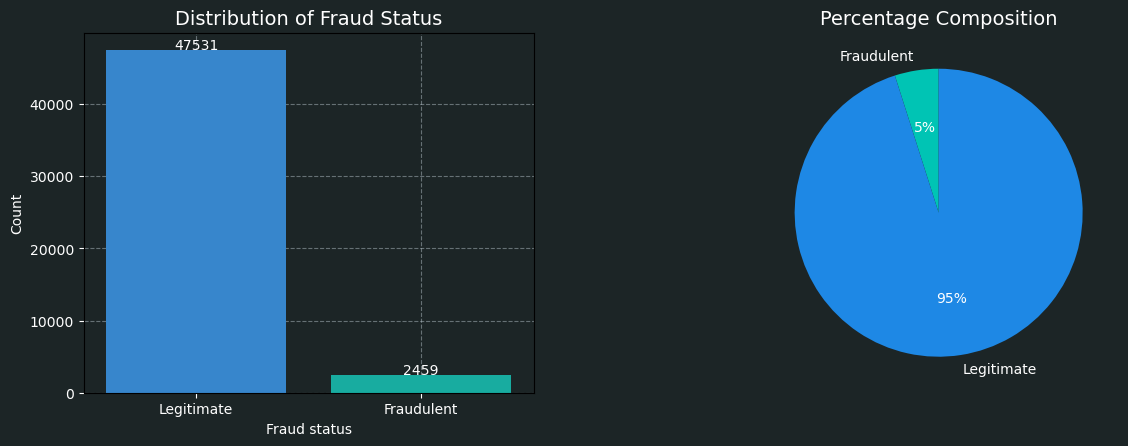

In [265]:
plt.show(target_class(fraud_df))

There is a gross imbalance between the two classes. Only 5% of the transactions are fraudulent, whilst the rest are legitimate. This indicates that though fraud is a challenge that results in significant business loss, it does not occur as often as legitimate transactions. This could be due to mitigation stategies that are already in place to handle and minimise fraudulent transactions. Additionally, the high risk to low reward of commiting fraud could be deterring criminals. Further analysis of the fraudulent cases is needed to identify their impact and compose a pattern of recognition.

The large imbalance observed, needs to be remedied in data preprocessing to create two equal classes that the model will be trained on. This large imbalance, if not rectified, will introduce great bias in the model. The model will favour the classification of the larger class, resulting in excellent predictions of legitimate cases but failure to identify fraudulent cases. This would defeat the entire purpose of the model, which is to detect fraudulent online transactions. Methods used to equalise the classes will be discussed in data preprocessing.

### *6.6 Rate of fraudulent transactions and Total Fraud Loss*

Since fraud can incurr some finiancial loss, the rate of fradulent transactions as well as the associated loss is investigated for all features. The code below calculates the total amount of dollars lost to fraudulent transactions each year and the average fraud loss per hour.

In [269]:
colors = ['#00C4B4', '#1E88E5', '#4DD0E1', '#008E7A', '#64B5F6']
palette = {'Legitimate': '#1E88E5', 'Fraudulent': '#00C4B4'}
background_color = '#1C2526'
text_color = '#FFFFFF'
grid_color = '#B0BEC5'

df = fraud_df[fraud_df['Fraudulent'] == 1]
legit_df = fraud_df[fraud_df['Fraudulent'] == 0]

# Calculate total fraud loss
total_fraud_loss = df['Transaction_Amount'].sum()

# Count unique hours
unique_hours = fraud_df['Time_of_Transaction'].nunique()

# Calculate fraud loss per hour
fraud_loss_per_hour = total_fraud_loss / unique_hours

# Display results
print("Fraud Analysis:")
print(f"Total fraud loss: ${total_fraud_loss:.2f}")
print(f"Number of unique hours: {unique_hours}")
print(f"Average fraud loss per hour: ${fraud_loss_per_hour:.2f}")


Fraud Analysis:
Total fraud loss: $7629239.49
Number of unique hours: 24
Average fraud loss per hour: $317884.98


It is found that the total loss was more than `7.5 million dollars`, withs an average loss of slightly more than` 3 hundred thousand dollarsper  hou`. This is a large sum of money for any organisation to loss, thus it necessary to detect and prevent as much of that loss as possible


#### *6.6.1 Time of transaction*

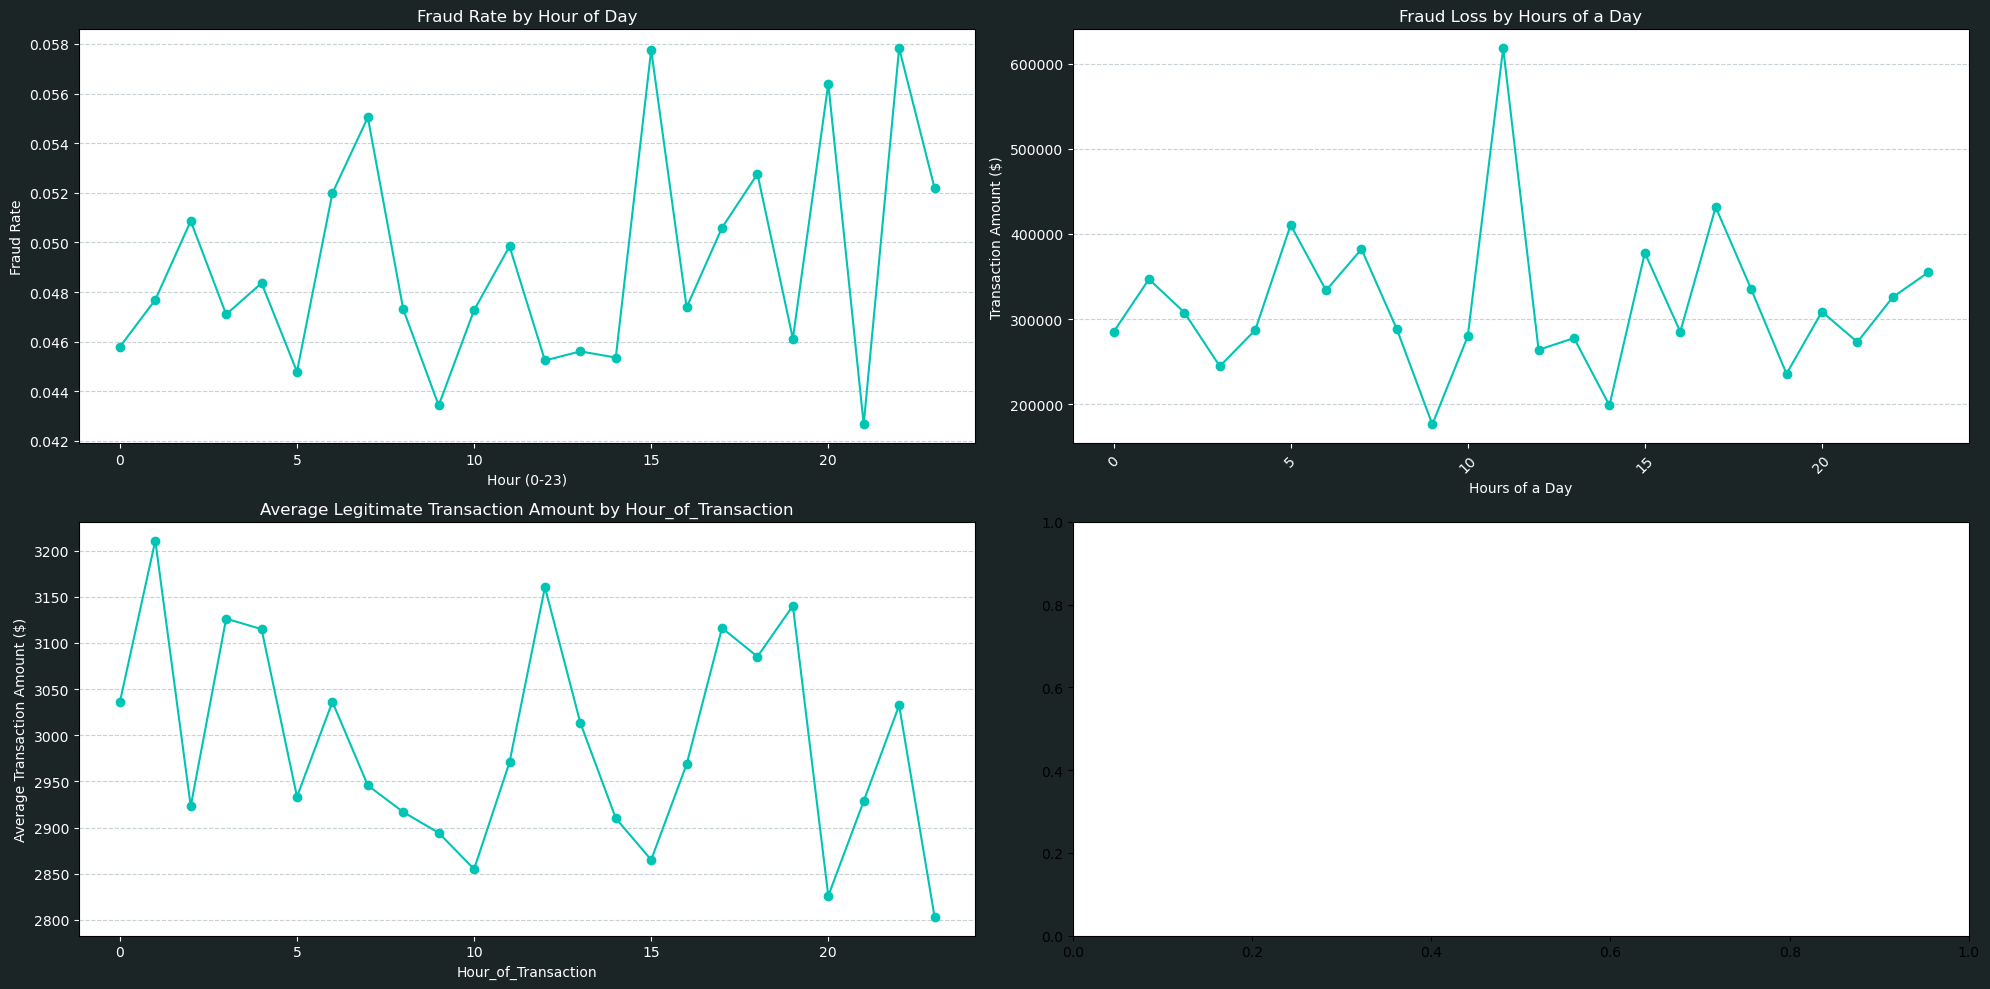

In [273]:
df['Hour_of_Transaction'] = df['Time_of_Transaction'].apply(lambda x: x.hour)
fraud_df['Hour_of_Transaction'] = fraud_df['Time_of_Transaction'].apply(lambda x: x.hour)
legit_df['Hour_of_Transaction'] = legit_df['Time_of_Transaction'].apply(lambda x: x.hour)

# Calculate fraud rate by hour
fraud_by_hour = fraud_df.groupby('Hour_of_Transaction')['Fraudulent'].mean()

# Plot
fig, ax = plt.subplots(2, 2, figsize=(20, 10),facecolor=background_color)
plt.subplot(2, 2,1)
fraud_by_hour.plot(kind='line', color=colors, marker='o', markersize=6)
#plt.set_facecolor(background_color)
plt.title('Fraud Rate by Hour of Day',color=text_color)
plt.xlabel('Hour (0-23)',color=text_color)
plt.ylabel('Fraud Rate',color=text_color)
plt.xticks(rotation=0)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7,color=grid_color)

# Calculate fraud loss per hour
fraud_loss_by_hour = df.groupby('Hour_of_Transaction')['Transaction_Amount'].sum()

# Plot
plt.subplot(2, 2,2)
fraud_loss_by_hour.plot(kind='line', color=colors, marker='o', markersize=6)
plt.title('Fraud Loss by Hours of a Day',color=text_color)
plt.xlabel('Hours of a Day',color=text_color)
plt.ylabel('Transaction Amount ($)',color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7,color=grid_color)

# Calculate average legitimate transaction amount by Hour_of_Transaction
legit_amount_by_hour = legit_df.groupby('Hour_of_Transaction')['Transaction_Amount'].mean()

# Plot
plt.subplot(2, 2,3)
legit_amount_by_hour.plot(kind='line', color=colors, marker='o', markersize=6)
#plt.facecolor(background_color)
plt.title('Average Legitimate Transaction Amount by Hour_of_Transaction',color=text_color)
plt.xlabel('Hour_of_Transaction',color=text_color)
plt.ylabel('Average Transaction Amount ($)',color=text_color)
plt.xticks(rotation=0)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7,color=grid_color)

# Show plot
plt.tight_layout()
plt.show()

The highest fraud rate occurs around hour 15 (5 PM), reaching approximately 0.058, indicating a significant spike in fraudulent activity during this time. Another notable peak occurs around hour 5 (5 AM), with a fraud rate of about 0.052. The lowest fraud rate is observed around hour 22 (10 PM), dropping to around 0.042, suggesting this is a relatively safer time for transactions.

When it comes to fraud loss, the highest fraud loss occurs around hour 11 (11 AM), with a transaction amount of approximately 600,000, indicating a significant financial impact from fraud at this time. Another peak is observed around hour 17 (5 PM), with a fraud loss of around 500,000, aligning with the high fraud rate at this hour. There’s a partial correlation between fraud rate and fraud loss: hour 18 shows both a high fraud rate (0.058) and a high fraud loss (500,000). However, the peak fraud loss at hour 11 (600,000) doesn’t align with a peak fraud rate (around 0.046), suggesting that fraud incidents at hour 10 might involve higher transaction amounts.

#### *6.6.2 Previous fraudulent transactions*

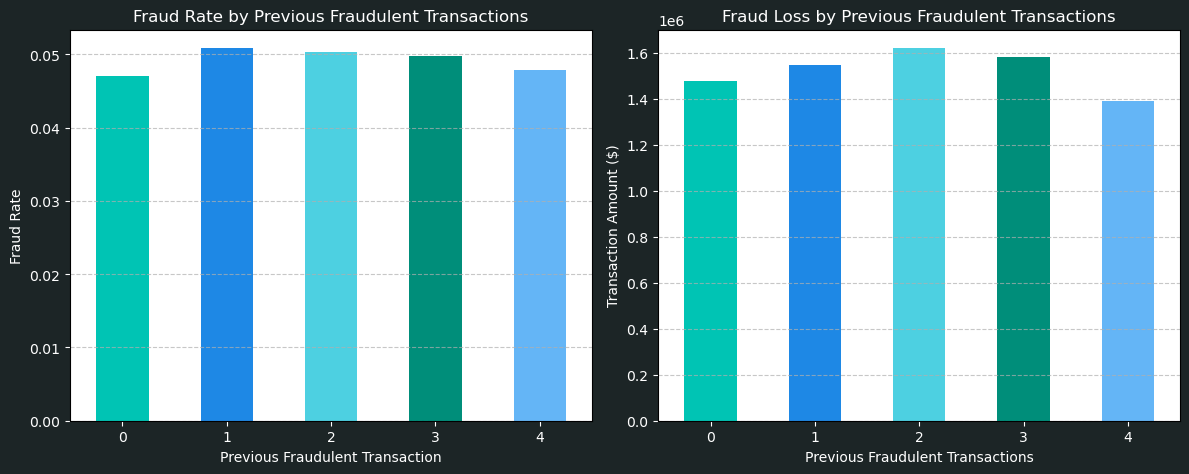

In [591]:
# Calculate fraud rate by Previous fraudulent transactions
fraud_by_prev = fraud_df.groupby('Previous_Fraudulent_Transactions')['Fraudulent'].mean()

# Plot
plt.figure(figsize=(12, 5),facecolor=background_color)
plt.subplot(1, 2,1)
fraud_by_prev.plot(kind='bar', color=colors)
plt.title('Fraud Rate by Previous Fraudulent Transactions',color=text_color)
plt.xlabel('Previous Fraudulent Transaction',color=text_color)
plt.ylabel('Fraud Rate',color=text_color)
plt.xticks(rotation=0)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate fraud loss by Previous fraudulent transactions
fraud_loss_by_pft = df.groupby('Previous_Fraudulent_Transactions')['Transaction_Amount'].sum()

# Plot
plt.subplot(1, 2,2)
fraud_loss_by_pft.plot(kind='bar', color=colors)
plt.title('Fraud Loss by Previous Fraudulent Transactions', color=text_color)
plt.xlabel('Previous Fraudulent Transactions',color=text_color)
plt.ylabel('Transaction Amount ($)',color=text_color)
plt.xticks(rotation=0)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

From the above figures, it is observed that users with 1 previous fraudulent transaction have the highest fraud rate at approximately 0.05, indicating that a single prior fraud incident significantly increases the likelihood of future fraud. Users with 2 previous fraudulent transactions follow closely, with a fraud rate of around 0.048. Users with 0 previous fraudulent transactions have the lowest fraud rate at around 0.042, suggesting that users with no fraud history are less likely to engage in fraudulent activity. The fraud rate peaks at 1 previous fraudulent transaction (0.05) and then slightly decreases as the number of previous frauds increases, dropping to 0.043 for 4 previous frauds. This suggests that while an initial fraudulent transaction significantly increases the fraud rate, the effect may plateau or slightly diminish with additional fraud incidents, possibly due to interventions or account restrictions after multiple frauds.

Users with 2 previous fraudulent transactions have the highest fraud loss, with a transaction amount of approximately 1.6 million, indicating that the financial impact of fraud peaks at this level of prior fraud history. Users with 3 previous fraudulent transactions follow closely, with a fraud loss of around 1.5 million. Users with 4 previous fraudulent transactions have the lowest fraud loss at around 1.3 million, despite having a moderate fraud rate, suggesting that the financial impact per fraud incident might decrease after multiple frauds. Fraud loss increases from 0 to 2 previous fraudulent transactions (from 1.4 million to 1.6 million), then slightly decreases to 1.5 million for 3 previous frauds and further to 1.3 million for 4 previous frauds. This trend suggests that the financial impact of fraud grows with the first few fraudulent incidents but may decrease after a certain point, possibly due to account monitoring, transaction limits, or other fraud prevention measures kicking in after multiple incidents.

#### *6.6.3 Number of Transactions Last 24H*

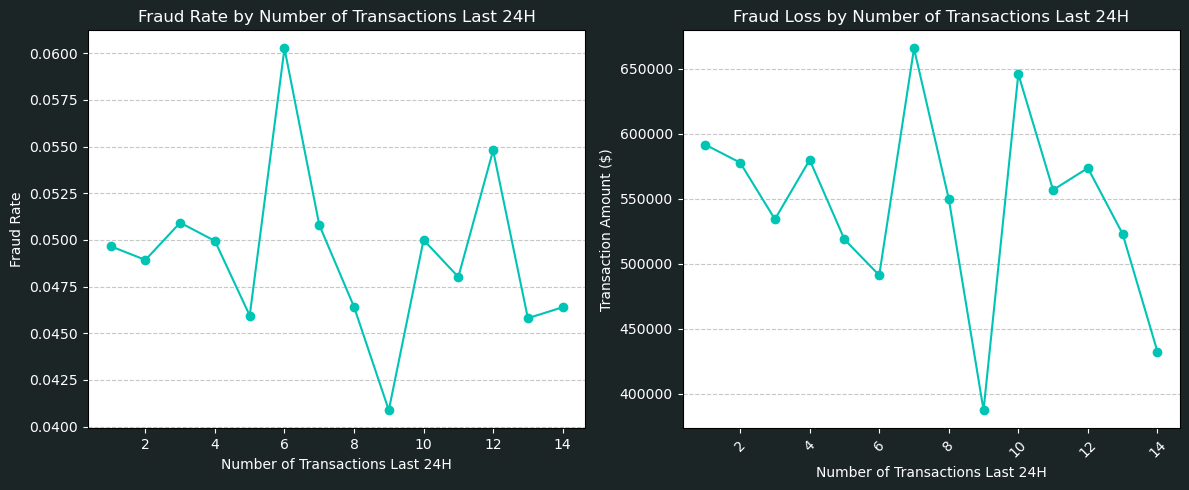

In [597]:
# Calculate fraud rate by Number of Transactions Last 24H
fraud_by_num = fraud_df.groupby('Number_of_Transactions_Last_24H')['Fraudulent'].mean()

# Plot
plt.figure(figsize=(12, 5),facecolor=background_color)
plt.subplot(1,2,1)
fraud_by_num.plot(kind='line', color=colors, marker='o', markersize=6)
plt.title('Fraud Rate by Number of Transactions Last 24H', color=text_color)
plt.xlabel('Number of Transactions Last 24H', color=text_color)
plt.ylabel('Fraud Rate', color=text_color)
plt.xticks(rotation=0)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate fraud loss by Number of Transactions Last 24H
fraud_loss_by_amount = df.groupby('Number_of_Transactions_Last_24H')['Transaction_Amount'].sum()

# Plot
plt.subplot(1,2,2)
fraud_loss_by_amount.plot(kind='line', color=colors, marker='o', markersize=6)
plt.title('Fraud Loss by Number of Transactions Last 24H', color=text_color)
plt.xlabel('Number of Transactions Last 24H', color=text_color)
plt.ylabel('Transaction Amount ($)', color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

From the plots, it is seen that the highest fraud rate occurs at 8 transactions in the last 24 hours, reaching approximately 0.060, indicating a significant spike in fraudulent activity at this transaction frequency. Another notable peak is at 10 transactions, with a fraud rate of around 0.055. The lowest fraud rate is observed at 12 transactions, dropping to around 0.040, suggesting that users with this transaction frequency are less likely to engage in fraudulent activity. Users with 8 transactions in the last 24 hours are at the highest risk of fraud, possibly indicating that fraudsters target users with moderate to high transaction activity. The low fraud rate at 12 transactions suggests that very high transaction frequencies might not always correlate with higher fraud, possibly due to increased monitoring or user vigilance at this level.

The highest fraud loss occurs at 8 transactions in the last 24 hours, with a transaction amount of approximately 650,000, aligning with the peak fraud rate at this transaction frequency. Another peak is observed at 10 transactions, with a fraud loss of around 600,000. The lowest fraud loss is at 12 transactions, with a value of around 400,000, which corresponds with the lowest fraud rate at this transaction frequency.

#### *6.6.4 Transaction amount*

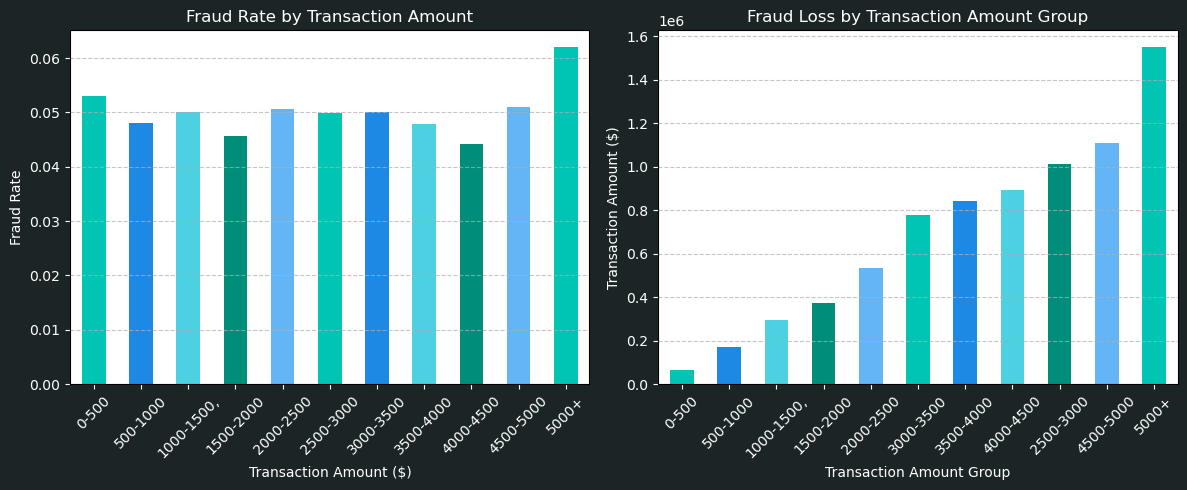

In [599]:
bins = [0,500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, float('inf')]
labels = ['0-500', '500-1000', '1000-1500,', '1500-2000','2000-2500','2500-3000','3000-3500','3500-4000','4000-4500','4500-5000','5000+']

# Create the 'Transaction_Amount_Group' feature
fraud_df['Transaction_Amount_Group'] = pd.cut(fraud_df['Transaction_Amount'], bins=bins, labels=labels, right=True, include_lowest=True)

# Calculate fraud rate by Transaction Amount
fraud_by_amount = fraud_df.groupby('Transaction_Amount_Group')['Fraudulent'].mean()

# Plot
plt.figure(figsize=(12, 5),facecolor=background_color)
plt.subplot(1,2,1)
fraud_by_amount.plot(kind='bar', color=colors)
plt.title('Fraud Rate by Transaction Amount',color=text_color)
plt.xlabel('Transaction Amount ($)',color=text_color)
plt.ylabel('Fraud Rate',color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate fraud loss by Transaction Amount
df = fraud_df[fraud_df['Fraudulent'] == 1]
fraud_loss_by_amount = df.groupby('Transaction_Amount_Group')['Transaction_Amount'].sum().sort_values()

# Plot
plt.subplot(1, 2,2)
fraud_loss_by_amount.plot(kind='bar', color=colors)
plt.title('Fraud Loss by Transaction Amount Group',color=text_color)
plt.xlabel('Transaction Amount Group',color=text_color)
plt.ylabel('Transaction Amount ($)',color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

Transactions in the 5000+ amount group have the highest fraud rate at approximately 0.06, indicating that larger transactions are more likely to be fraudulent. The 0–500 amount group also has a high fraud rate, around 0.055, suggesting that very small transactions are also prone to fraud. Perhaps the fraudster commneces with transfering a small amount to ensure that the account indeed has money and the proceeds to transferring a high amout of to test tye limits of the acccount, and if permitted, proceeds to an even high amount. However some may choose money in between to remain under the radar and not be detected. Transactions in the 3500–4000 amount group have the lowest fraud rate at around 0.04, indicating that this range is the least susceptible to fraud among the groups shown.

Transactions in the 5000+ amount group have the highest fraud loss, with a transaction amount of approximately 1.6 million, aligning with the high fraud rate in this group and indicating a significant financial impact. The 4500–5000 amount group follows with a fraud loss of around 1.2 million. Transactions in the 0–500 amount group have the lowest fraud loss at around 0.1 million, despite their high fraud rate, suggesting that while fraud is frequent in this group, the financial impact per incident is small due to the low transaction amounts.

#### *6.6.5 Account age*

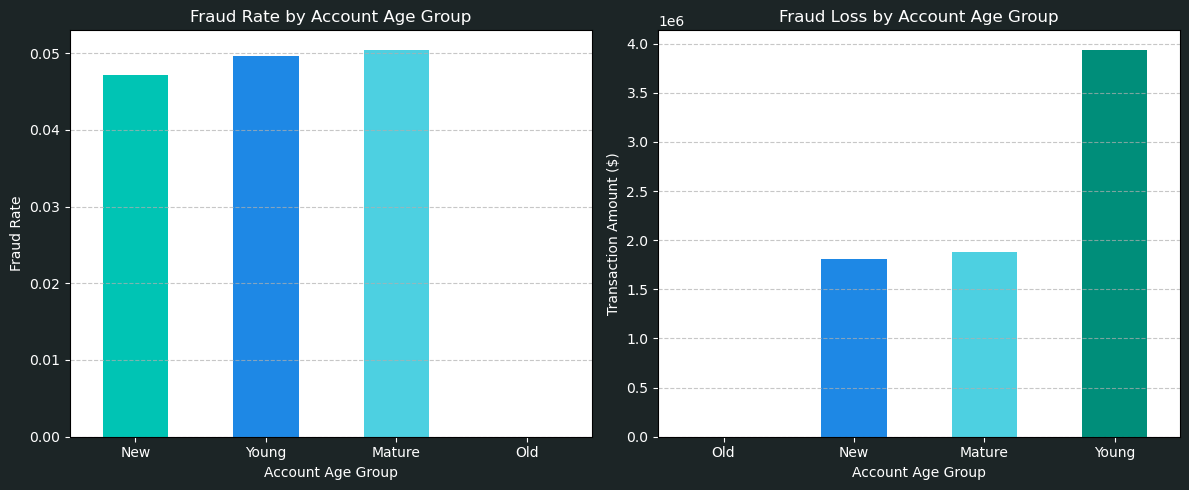

In [601]:
# Define bins and labels for age groups (in days)
bins = [0, 30, 90, 365, float('inf')]
labels = ['New', 'Young', 'Mature', 'Old']

# Create the 'Account_Age_Group' feature
fraud_df['Account_Age_Group'] = pd.cut(fraud_df['Account_Age'], bins=bins, labels=labels, right=True, include_lowest=True)


# Calculate fraud rate by Account age
fraud_by_age = fraud_df.groupby('Account_Age_Group')['Fraudulent'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 5),facecolor=background_color)
plt.subplot(1, 2,1)
fraud_by_age.plot(kind='bar', color=colors)
plt.title('Fraud Rate by Account Age Group', color=text_color)
plt.xlabel('Account Age Group', color=text_color)
plt.ylabel('Fraud Rate', color=text_color)
plt.xticks(rotation=0)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate fraud loss by Account age
df = fraud_df[fraud_df['Fraudulent'] == 1]
fraud_loss_by_age = df.groupby('Account_Age_Group')['Transaction_Amount'].sum().sort_values()

# Plot
plt.subplot(1, 2,2)
fraud_loss_by_age.plot(kind='bar', color=colors)
plt.title('Fraud Loss by Account Age Group', color=text_color)
plt.xlabel('Account Age Group', color=text_color)
plt.ylabel('Transaction Amount ($)', color=text_color)
plt.xticks(rotation=0)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


The Mature account age group has the highest fraud rate at approximately 0.05, indicating that accounts in this age group are the most susceptible to fraudulent activity. The Young account age group follows closely, with a fraud rate of around 0.048. The New account age group has the lowest fraud rate at around 0.042, suggesting that newer accounts are less likely to be involved in fraudulent activity. Fraud rates increase from New (0.042) to Young (0.048) and peak at Mature (0.05), then slightly decrease for Old accounts (0.045). This suggests that accounts in the "middle" age groups (Young and Mature) are more prone to fraud, possibly due to a combination of established activity patterns and potential vulnerabilities that fraudsters exploit.

The young account age group has the highest fraud loss, with a transaction amount of approximately 4.0 million, indicating that fraudulent transactions involving younger accounts result in the highest financial impact. The New and Mature account age groups follow, with fraud losses of around 2.0 million each.

#### *6.6.6 Location*

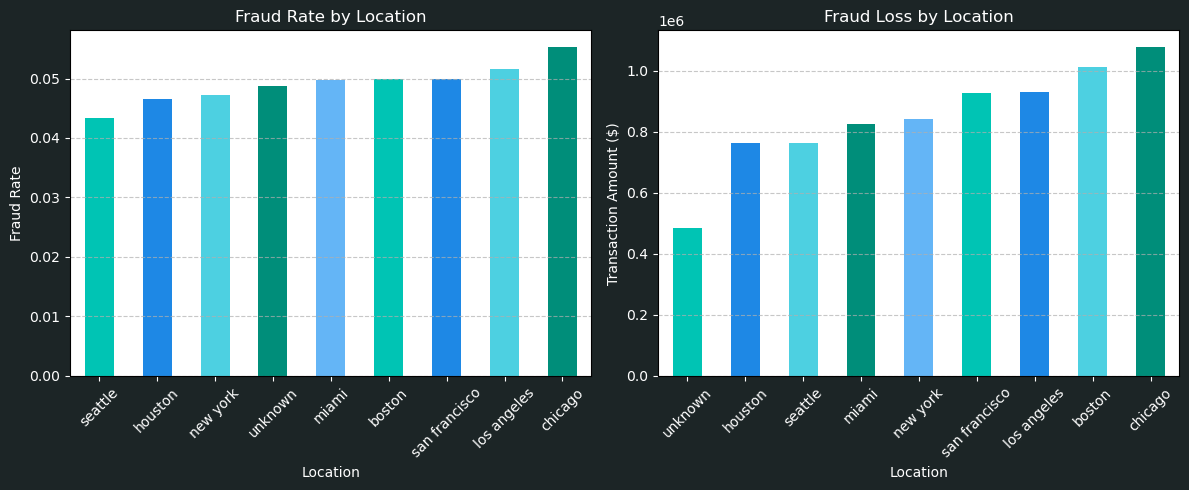

In [628]:
# Calculate fraud rate by Location
location_by_age = fraud_df.groupby('Location')['Fraudulent'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 5),facecolor=background_color)
plt.subplot(1,2,1)
location_by_age.plot(kind='bar', color=colors)
plt.title('Fraud Rate by Location',color=text_color)
plt.xlabel('Location',color=text_color)
plt.ylabel('Fraud Rate',color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate fraud loss by Location
fraud_loss_by_location = df.groupby('Location')['Transaction_Amount'].sum().sort_values()

# Plot
plt.subplot(1,2,2)
fraud_loss_by_location.plot(kind='bar', color=colors)
plt.title('Fraud Loss by Location', color=text_color)
plt.xlabel('Location', color=text_color)
plt.ylabel('Transaction Amount ($)', color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()



Chicago has the highest fraud rate at approximately 0.05, indicating that transactions from this location are the most susceptible to fraudulent activity. Los Angeles and San Francisco follow closely, with fraud rates of around 0.048 each. Seattle has the lowest fraud rate at around 0.042, suggesting that transactions from this location are the least likely to be fraudulent. Larger cities like Chicago, Los Angeles, and San Francisco have the highest fraud rates, possibly due to higher transaction volumes or more opportunities for fraud in these areas. Smaller or less densely populated locations like Seattle have the lowest fraud rate, which might reflect fewer transactions or better fraud prevention measures in that area.

Chicago also has the highest fraud loss, with a transaction amount of approximately 1.1 million, aligning with its high fraud rate and indicating a significant financial impact from fraud in this location. Los Angeles follows closely, with a fraud loss of around 1.0 million. Seattle has the lowest fraud loss at around 0.5 million, consistent with its low fraud rate, suggesting a minimal financial impact from fraud in this location.

#### *6.6.7 Device used*

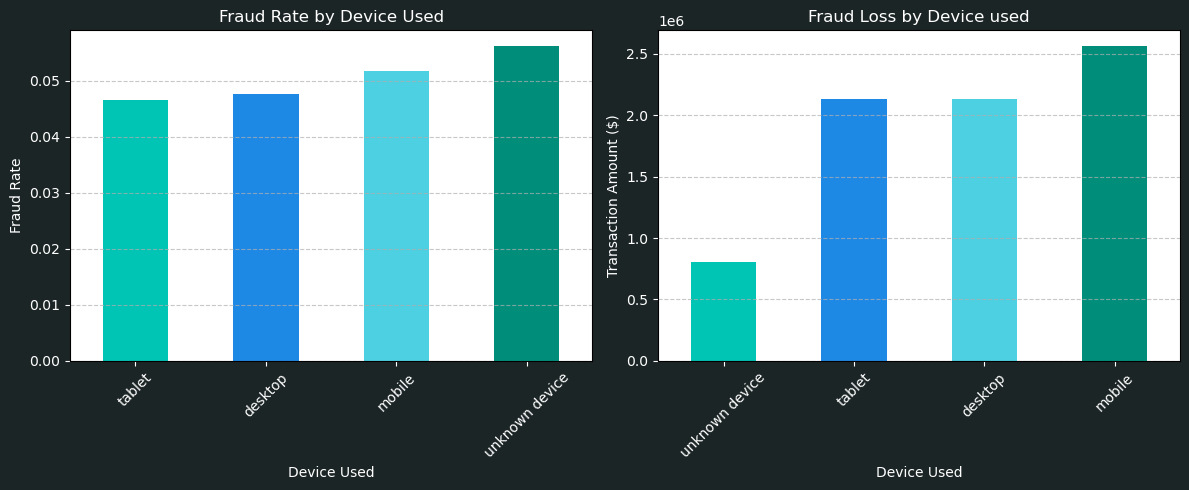

In [605]:
# Calculate fraud rate by Device Used
fraud_by_device = fraud_df.groupby('Device_Used')['Fraudulent'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 5),facecolor=background_color)
plt.subplot(1,2,1)
fraud_by_device.plot(kind='bar', color=colors)
plt.title('Fraud Rate by Device Used', color=text_color)
plt.xlabel('Device Used', color=text_color)
plt.ylabel('Fraud Rate', color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate fraud loss by Device Used
fraud_loss_by_du = df.groupby('Device_Used')['Transaction_Amount'].sum().sort_values()

# Plot
plt.subplot(1,2,2)
fraud_loss_by_du.plot(kind='bar', color=colors)
plt.title('Fraud Loss by Device used', color=text_color)
plt.xlabel('Device Used', color=text_color)
plt.ylabel('Transaction Amount ($)', color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

The figure above show that unknown device has the highest fraud rate at approximately 0.05, indicating it is the most susceptible to fraudulent transactions among the device types shown, possibly due to anonymity (unknown device) or widespread use (mobile). Mobile follows closely with a fraud rate of around 0.048. Tablet has the lowest fraud rate at around 0.042, suggesting it is the least prone to fraud in this dataset and might reflect fewer transactions or stronger security measures on tablets.

Mobile leads in fraud loss, with a transaction amount of approximately 2.5 million, indicating that fraudulent transactions on mobile devices result in the highest financial impact. Desktop and unknown device follow with fraud losses of around 2.2 million each. Tablet has the lowest fraud loss at around 1.0 million, aligning with its low fraud rate and suggesting minimal financial impact from fraud on this device type.

#### *6.6.8 Transaction type*

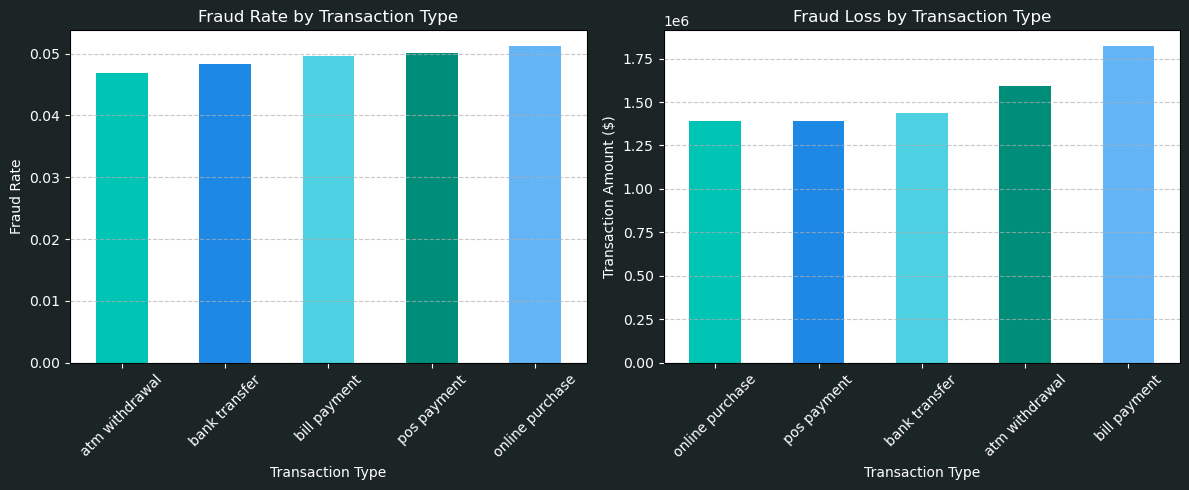

In [618]:
# Calculate fraud rate by Transaction Type
fraud_by_type = fraud_df.groupby('Transaction_Type')['Fraudulent'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 5),facecolor=background_color)
plt.subplot(1,2,1)
fraud_by_type.plot(kind='bar', color=colors)
plt.title('Fraud Rate by Transaction Type',color=text_color)
plt.xlabel('Transaction Type',color=text_color)
plt.ylabel('Fraud Rate',color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)


fraud_loss_by_tt = df.groupby('Transaction_Type')['Transaction_Amount'].sum().sort_values()

# Plot
plt.subplot(1,2,2)
fraud_loss_by_tt.plot(kind='bar', color=colors)
plt.title('Fraud Loss by Transaction Type', color=text_color)
plt.xlabel('Transaction Type', color=text_color)
plt.ylabel('Transaction Amount ($)', color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

The plots reveal that online purchase has the highest fraud rate at approximately 0.05, indicating it is the most susceptible to fraudulent transactions among the types shown. POS payment and bill payment follow closely, both with fraud rates around 0.045. This suggests that these transaction types might be more targeted by fraudsters, possibly due to their digital nature or higher transaction frequency. ATM withdrawal has the lowest fraud rate at around 0.035, suggesting it is the least prone to fraud in this dataset likely due stronger security measures at ATMs or fewer opportunities for fraud in physical transactions.

Bill payment leads in fraud loss, with a transaction amount of approximately 1.9 million, indicating that fraudulent bill payments result in the highest financial impact. ATM withdrawal follows with a fraud loss of around 1.75 million, and bank transfer is close at around 1.7 million. POS payment has the lowest fraud loss at around 1.4 million, despite its relatively high fraud rate, suggesting that fraudulent POS transactions might involve smaller amounts on average. Online purchase has a fraud loss of around 1.5 million, also relatively lower despite its high fraud rate.

#### *6.6.9 Payment method*

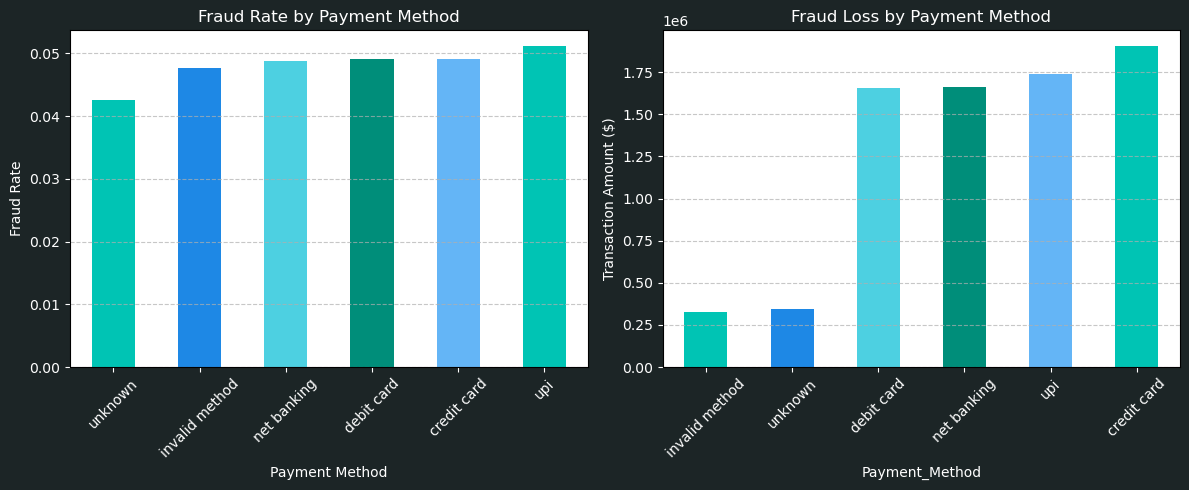

In [609]:
# Calculate fraud rate by Payment Method
fraud_by_pay = fraud_df.groupby('Payment_Method')['Fraudulent'].mean().sort_values()

# Plot
plt.figure(figsize=(12, 5),facecolor=background_color)
plt.subplot(1,2,1)
fraud_by_pay.plot(kind='bar', color=colors)
plt.title('Fraud Rate by Payment Method', color=text_color)
plt.xlabel('Payment Method', color=text_color)
plt.ylabel('Fraud Rate', color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate fraud loss by Payment Method
fraud_loss_by_pm = df.groupby('Payment_Method')['Transaction_Amount'].sum().sort_values()

# Plot
plt.subplot(1,2,2)
fraud_loss_by_pm.plot(kind='bar', color=colors)
plt.title('Fraud Loss by Payment Method', color=text_color)
plt.xlabel('Payment_Method', color=text_color)
plt.ylabel('Transaction Amount ($)', color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show plot
plt.tight_layout()
plt.show()

The fraud rate plot shows that UPI has the highest fraud rate at approximately 0.05, indicating it is the most susceptible to fraudulent transactions among the payment methods shown. Credit card and net banking follow closely, both with fraud rates around 0.045. This suggests that suggesting these methods might be more targeted by fraudsters, possibly due to their widespread use or vulnerabilities in their systems. The "unknown" payment method has the lowest fraud rate at around 0.035, suggesting it is the least prone to fraud in this dataset. Invalid method and debit card have fraud rates around 0.04, placing them in the middle of the range. The fraud rates across all methods are relatively close, ranging from 0.035 to 0.05, indicating no extreme outliers in fraud susceptibility.

UPI also leads in fraud loss, with a transaction amount of approximately 1.9 million, indicating that not only is UPI prone to fraud, but the financial impact is significant. Credit card follows with a fraud loss of around 1.75 million, and net banking is close at around 1.7 million. The "unknown" payment method has the lowest fraud loss at around 0.25 million, aligning with its low fraud rate and suggesting minimal financial impact from fraud in this category. Invalid method also has a low fraud loss at around 0.3 million.

### *6.7 Top 10 Users*

#### *6.7.1 Most Fraudulent transactions*

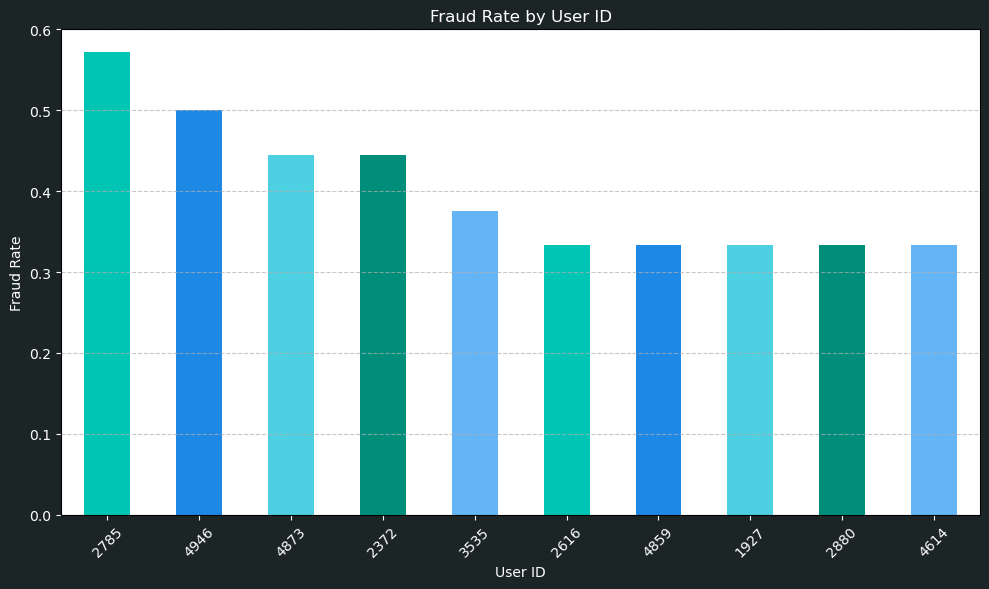

In [611]:
users_df = fraud_df.groupby('User_ID')['Fraudulent'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6),facecolor=background_color)
users_df.plot(kind='bar', color=colors)
plt.title('Fraud Rate by User ID', color=text_color)
plt.xlabel('User ID', color=text_color)
plt.ylabel('Fraud Rate', color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

From the graph above, it is observed that user 2785 has the highest fraud rate at approximately 0.55, indicating a significant likelihood of fraudulent activity compared to others. User 4946 follows closely with a fraud rate of around 0.5, also suggesting a high risk of fraud. User 4614 has the lowest fraud rate at around 0.3, making them the least likely among the shown users to be involved in fraudulent activity. The fraud rates range from 0.3 (user 4614) to 0.55 (user 2785), showing moderate variation across users. Most users ,7 out of 10, have fraud rates between 0.3 and 0.45, indicating that high fraud rates (above 0.5) are less common in this dataset. Several users have fraud rates around 0.45, suggesting a common level of suspicious activity among a subset of users. Users 2616, 4859, 1927, and 2880 have fraud rates around 0.35, forming another cluster of relatively lower fraud risk.

#### *6.7.2 Highest average transaction amount*

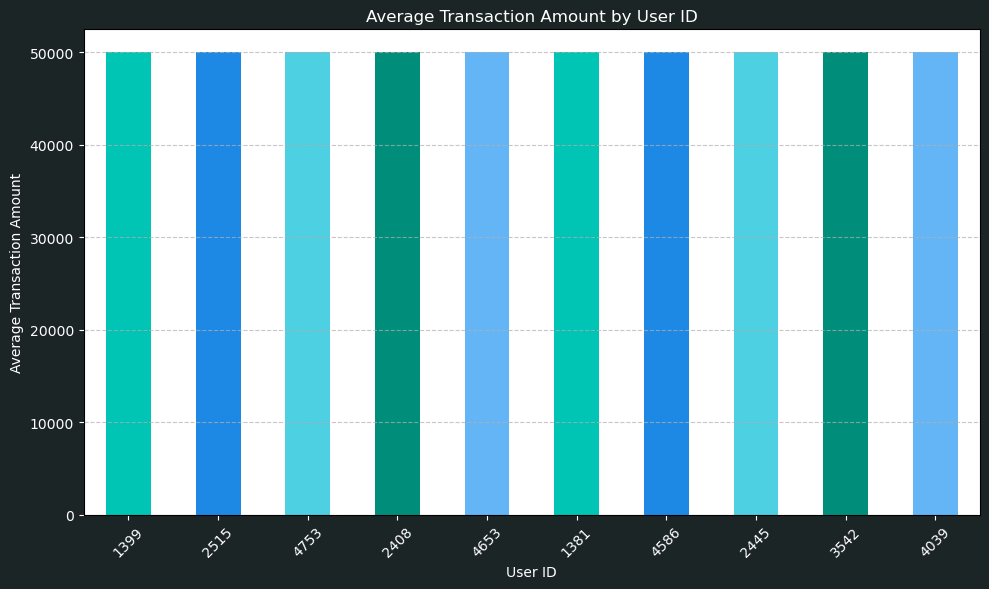

In [613]:
f_df = fraud_df[fraud_df['Fraudulent']==1]
users_amount_df = f_df.groupby('User_ID')['Transaction_Amount'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6),facecolor=background_color)
users_amount_df.plot(kind='bar', color=colors)
plt.title('Average Transaction Amount by User ID', color=text_color)
plt.xlabel('User ID', color=text_color)
plt.ylabel('Average Transaction Amount', color=text_color)
plt.xticks(rotation=45)
plt.tick_params(axis='both', colors=text_color)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

The reason why the top users that have a higher rate of fraud dont appear here with the top users with the heighest transaction amount could be because fraudsters know that transferring an unusually high amount of fraud could result in them the being easily detected, so they probably conform to an reasonable amount to avoid detection.

### *6.8 Correlation between features and target variable*

The relationship between the features and the target variable is investigated. This is done by computing the correlation matrix for numerical features and the target variable. The matrix is then displayed as a heatmap, demostrating the correlation values between the features.

Text(0.5, 1.0, 'Correlation between features and Target variable')

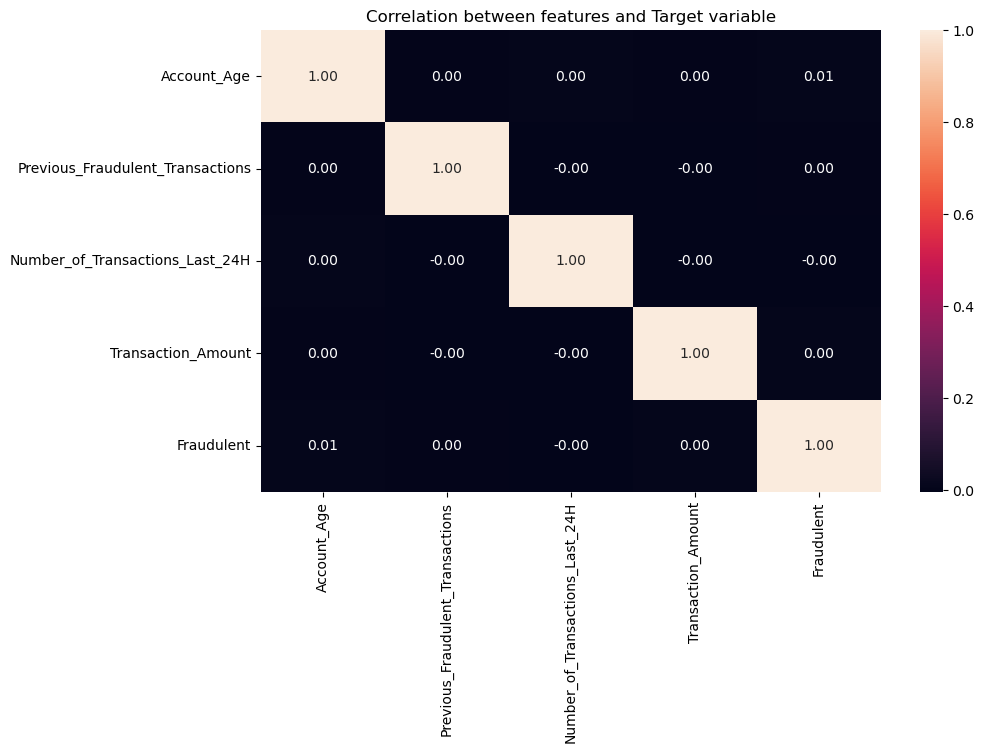

In [317]:
# Calculate average legitimate transaction amount by Hour_of_Transaction
corr_matrix= fraud_df[['Account_Age','Previous_Fraudulent_Transactions', 'Number_of_Transactions_Last_24H','Transaction_Amount','Fraudulent']].corr()

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
ax.set_title('Correlation between features and Target variable')

From the correlation matrix, it is clear that the features are independent and have no correlation to one another. Additionally, the features have a weak correlation with the target variable. However, Account_Age seems to have a slightly stronger relation to the target variable. This is likely due to the pattern of slightly longer account ages being associated with fraudulent transactions. Due to the binary nature of the variable, zero correlation is not a negative indication. It simply suggests that there is a large similarity between the values in both classes.

---
<a href=#six></a>
## **7. Modeling**
<a href=#cont>Back to Table of Contents</a>

Proceeding data anlysis, the data is utilised to develop robust machine learning models capable of detecting fraudulent transactions. The data is initially transformed to ensure it is in the approriate format for model training. Finally, various models are trained and tuned to find the optimal hyperparameters to cast predicts for the test set. These predictions will be used in the subsequent section to find the best performing model.

---


### *7.1 Data Preprocessing*

In this part of the section, the datset is preprocessed to ensure it is suitable for model training. This starts with transforming categorical columns into numerical representations by way of dummy encoding. Then the classes are balanced to ensure a non-biased model. Ultimately the datset is scaled to avoid dominance of larger numerical features, and split into the training and testing dataset.

#### *7.1.1 Encoding*

The function below takes in the fraud DataFrame and locates categorical columns, whilst dropping irrelevant columns. The categorical columns proceed to be dummy encoded using `get_dummies()`. These columns are then transformed to intergers representing the categorical values.

In [323]:
def encoding(df):
    """
    Preprocesses the data to make it suitable or machine learning models>

    Args:
        df (DataFrame): The Dataframe containing details for online banking transactions.
        
    Return:
        X_encoded (DataFrame): Encoded dataframe of feature
        y (pd.series): The target variable
    """

    df = df.drop(['Decimal_Part','Transaction_Amount_Group','Hour_of_Transaction','Account_Age_Group','Fraud_Status'],axis=1)
    df['Time_of_Transaction'] = fraud_df['Time_of_Transaction'].apply(lambda x: x.hour) 
    
    #Seperate predictor variables and target variable
    X = df.drop(['Transaction_ID','Fraudulent'],axis=1)
    y = df['Fraudulent']

    # Dummy encode categorical columns in predictor variable
    # Declare columns to be encoded
    columns = ['Transaction_Type','Device_Used','Location','Payment_Method']

    X_encoded = pd.get_dummies(X, columns=columns, prefix=columns, drop_first=True)

    # Identify boolean columns
    bool_cols = X_encoded.select_dtypes(include=['bool']).columns

    # Convert boolean columns to numeric (1 for True, 0 for False)
    X_encoded[bool_cols] = X_encoded[bool_cols].astype(int)

    return  X_encoded,y

In [324]:
#Apply encoding function
X_encoded,y = encoding(fraud_df)

#Display first 5 rows of X_encoded
X_encoded.head()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Transaction_Type_bank transfer,Transaction_Type_bill payment,Transaction_Type_online purchase,Transaction_Type_pos payment,...,Location_miami,Location_new york,Location_san francisco,Location_seattle,Location_unknown,Payment_Method_debit card,Payment_Method_invalid method,Payment_Method_net banking,Payment_Method_unknown,Payment_Method_upi
0,4174,1292.76,16,0,119,13,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,4507,1554.58,13,4,79,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1860,2395.02,11,3,115,9,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2294,100.10,15,4,3,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2130,1490.50,19,2,57,7,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


#### *7.1.2 Class Balancing*

The data revealed a significant imbalance for the two classes in the EDA section. This is necessary to balance to avoid a baised model efficient at classifying the majority class and not the minority class. To achieve this, a combination of upsampling and down sampling conducted. The majority class (legitimate) is reduced to 20 000 records using `RandomUnderSampler` and the fraudulent class is upsized using `SMOTE`. The resulting class distribution is visualised to show a balance.

In [338]:
# Apply SMOTE to balance classes for fraud dataset
def balance_class(X,y):
    """

    """
    
    # Define SMOTE and undersampling pipeline for exactly 20,000 per class
    smote = SMOTE(sampling_strategy={1: 20000}, random_state=42)  # Fraud to 20,000
    undersample = RandomUnderSampler(sampling_strategy={0: 20000}, random_state=42)  # Legit to 20,000
    resampling_pipeline = ImbPipeline([
        ('smote', smote),
        ('undersample', undersample)
    ])
    
    # Apply SMOTE to create synthetic samples
    X_balanced, y_balanced = resampling_pipeline.fit_resample(X, y)
    
    # Combine balanced features and target into a new DataFrame
    df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
    df_balanced['Fraudulent'] = y_balanced
    
    return df_balanced

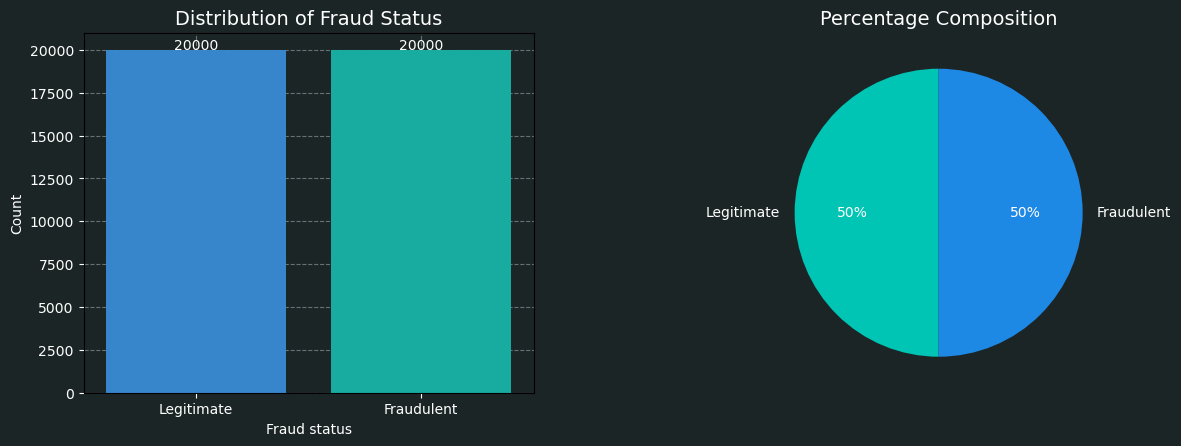

In [340]:
#Apply balance_class function to fraud_df
fraud_balanced_df = balance_class (X_encoded,y)

#Visualise target variable classes
plt.show(target_class(fraud_balanced_df))

The dataset now contains 40 000 records, with each class accounting for 50% of the transactions.

#### *7.1.3 Scaling*

To ensure that features with larger numerical ranges or different units don't disproportionately influence the model, the datset is normalised. This is done to avoid biased results, slower convergence, or poor performance. The scaling is executed using `StandardScaler` which transforms features to have a mean of 0 and a variance of 1 Furthermore, the datset is split into training and testing set, , with the test set being 20% of the original dataset and the rest being the train. The training dataset will then be suitable for modelling as all the features will have even contribution during model training.

In [352]:
def scaling(df):

    #Split DataFrame into features(X) and target(y)
    X = df.drop(columns=['Fraudulent','Fraud_Status'])
    y = df['Fraudulent']
    
    #Scale predictor varibales
    #Initialize Standard Scaler
    scaler = StandardScaler()

    #Fit transform peredictor variables
    X_scaled = scaler.fit_transform(X)

    #Split variables into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)
    
    return X_train, y_train, X_test, y_test

In [354]:
#Apply preprocessing to fraud DataFrame
X_train, y_train, X_test, y_test = scaling(fraud_balanced_df)

#Display X_train
pd.DataFrame(X_train).head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.815416,0.175800,0.902698,-0.621789,-0.226695,-0.884611,-0.388348,-0.391369,-0.384716,2.566565,...,-0.281295,-0.282019,-0.276296,-0.278230,-0.173125,2.337100,-0.131605,-0.42481,-0.167845,-0.428943
1,-0.351641,-0.087283,-0.373183,-1.381410,-0.350958,1.814246,-0.388348,-0.391369,-0.384716,2.566565,...,3.554984,-0.282019,-0.276296,-0.278230,-0.173125,-0.427881,-0.131605,-0.42481,-0.167845,-0.428943
2,1.001104,0.149308,-0.692153,0.137833,1.109134,1.004589,2.575010,-0.391369,-0.384716,-0.389626,...,-0.281295,3.545860,-0.276296,-0.278230,-0.173125,2.337100,-0.131605,-0.42481,-0.167845,-0.428943
3,-0.246650,-0.164056,-0.213698,1.657077,0.736344,-0.344840,2.575010,-0.391369,-0.384716,-0.389626,...,-0.281295,-0.282019,-0.276296,-0.278230,-0.173125,2.337100,-0.131605,-0.42481,-0.167845,-0.428943
4,0.455320,0.125519,-0.054213,0.137833,-0.350958,-0.884611,-0.388348,-0.391369,-0.384716,-0.389626,...,-0.281295,-0.282019,-0.276296,3.594146,-0.173125,-0.427881,-0.131605,-0.42481,-0.167845,-0.428943


In [356]:
#Display X_test
pd.DataFrame(X_test).head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.465324,-0.424786,-0.213698,0.137833,0.115029,-0.344840,-0.388348,-0.391369,-0.384716,-0.389626,...,-0.281295,-0.282019,-0.276296,-0.278230,-0.173125,-0.427881,-0.131605,-0.42481,-0.167845,2.331310
1,-0.352509,-0.093432,1.700123,0.137833,-0.071366,-1.154497,-0.388348,2.555133,-0.384716,-0.389626,...,-0.281295,-0.282019,-0.276296,3.594146,-0.173125,2.337100,-0.131605,-0.42481,-0.167845,-0.428943
2,0.457056,-0.152274,-1.170609,-0.621789,0.767410,0.194932,2.575010,-0.391369,-0.384716,-0.389626,...,-0.281295,-0.282019,-0.276296,-0.278230,-0.173125,-0.427881,-0.131605,-0.42481,-0.167845,-0.428943
3,-0.989401,-0.384747,1.381153,0.897455,-0.879076,0.194932,-0.388348,-0.391369,-0.384716,2.566565,...,-0.281295,-0.282019,-0.276296,-0.278230,-0.173125,2.337100,-0.131605,-0.42481,-0.167845,-0.428943
4,-0.054888,-0.141450,1.221668,1.657077,-0.226695,0.464817,-0.388348,-0.391369,-0.384716,-0.389626,...,-0.281295,-0.282019,-0.276296,-0.278230,-0.173125,-0.427881,-0.131605,-0.42481,-0.167845,-0.428943


In [358]:
#Display y_train
pd.DataFrame(y_train).head(5)

,Fraudulent
13475,0
19006,0
13812,0
47758,0
52521,1


In [360]:
#Display y_test
pd.DataFrame(y_test).head(5)

,Fraudulent
60354,1
17572,0
56036,1
44004,0
54424,1


The two datasets will be utilised for training fraud detecting models and evualuating their performance in subsequent sections.

### *7.2 Model Development*

The models responsible for the detection of fradualant transactions are developed in this segment. Each models has their own set of hyperparameters that affect their performance and can improve classification efficiency. To determine the best set of hyperparameters for each model, a list of varying values are evaluated using GridSearch with stratified cross validation. This form of cross validation splits the training dataset into a specified number of folds, and ensures that each fold has an equal distribution of the two classes. One fold is held back during training for each grid search iteration, and is used for validation check. The performance metric that is used for validation is F1 score. This metric assesses the models ability to balance the likelihood of false flags and the detection of fraudulent transactions. A higher score indicates a higher ability to perform this function. The differing hypeparameter values are evaluated using this metric, and the combination that yeilds the highest score is returned as the best parameters and model. 

#### *7.2.1 Logistic regression*

This model is a statistical method typically used for binary classification, altjhou it can extend to multi-class classification. It models the relationship between input features and the probability of a specific outcome. Instead of predicting a continuous value like linear regression, it outputs a probability score between 0 and 1, which is then thresholded, usually by 0.5, to assign a class. The model uses the sigmoid function to map a linear combination of features to a probability, by ensuresing the output is between 0 and 1. Common hyperparameters in logistic regression include:
* **C:** Regulirisation strenght, critical for balancing bias and variance. Smaller values of C increase regularization strength, leading to simpler models and larger values reduce regularization, allowing the model to fit the data more closely.
* **class_weight:** Adjusts weights for classes to handle imbalanced datasets.
* **max_iter:** Maximum number of iterations for the solver to converge.
* **penalty:** Controls overfitting by adding a penalty term to the loss function.
* **solver:** The algorithm used to optimize the loss function.

In [366]:
def Logsitic_regression_GridSearch(X_train,y_train):

    # Initialise logistic regression model
    model = LogisticRegression(random_state=42)

    # Initialise hyperparameters
    params = {
            'solver': [ 'lbfgs'],
            'penalty': ['l2','none'],     # Penalty
            'C':  [0.1,1.0,10,100,1000],          # Regularization strength
            'max_iter': [50,100,1000], # Maximum iterations 
            'class_weight': ['balanced']  
            }

    # Define F1-score as a scorer
    scorer = make_scorer(f1_score, average='binary')
    
    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        scoring=scorer
        )

    # Fit the grid search model
    grid_search.fit(X_train, y_train)

    # Best model and Parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_value = grid_search.best_score_

    return best_model, best_params, best_cv_value

In [368]:
#Apply grid search to find best logistic regression model
lr_model, lr_params, lr_cv_value =  Logsitic_regression_GridSearch(X_train, y_train)

#Display best values
print('Best Parameters:', lr_params)
print('Best cross validation:', lr_cv_value)

Best Parameters: {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross validation: 0.8793945414745682


In [369]:
#Create prediction for test set
lr_y_pred = lr_model.predict(X_test)

The best performing model has a cross validation value of `0.88`, and the following hyperparameters:
* **C:** 1.0
* **class_weight:** balanced
* **max_iter:** 50
* **penalty:** l2
* **solver:** lbfgs


(Section outro)

#### *7.2.2 Random Forest*

Random Forest is a machine learning method typically used for classification and regression, though it excels in binary and multiclass classification. It models the relationship between input features and an outcome by combining predictions from multiple decision trees to improve accuracy and robustness. Instead of relying on a single model like logistic regression, it outputs a class by aggregating the results of many trees through majority voting. The following hyperparametrs affect performance:
* **n_estimators:** The number of trees in the forest, critical for balancing bias and variance. Smaller values reduce computation but may underfit, while larger values improve accuracy but increase runtime.
* **class_weight:** Adjusts weights for classes to handle imbalanced datasets.
* **max_iter:** Not applicable in standard Random Forest implementations, as it doesn't use iterative solvers like logistic regression.
* **max_depth:** Controls overfitting by limiting the depth of each tree.
* **min_samples_split:** The minimum number of samples required to split an internal node. Higher values prevent overfitting by requiring larger nodes to split.
* **min_samples_leaf:** The minimum number of samples required to form a leaf node. Higher values create simpler trees, reducing overfitting.

In [378]:
def Random_forest_GridSearch(X_train,y_train):

    # Initialise Random forest model
    model = RandomForestClassifier(random_state=42)

    # Initialise hyperparameters
    params = {
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'max_features': ['auto', 'log2'],
            'class_weight': [{0: 1, 1: 19}]
            }
    
    scorer = make_scorer(f1_score, average='binary')

    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=scorer,
        n_jobs=-1,
        verbose=1
        )

    # Fit the grid search model
    grid_search.fit(X_train, y_train)

    # Best model and Parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_value = grid_search.best_score_

    return best_model, best_params, best_cv_value

In [380]:
#Apply grid search to find best random forest model
rf_model, rf_params, rf_cv_value =  Random_forest_GridSearch(X_train, y_train)

#Display best values}
print('Best Parameters:', rf_params)
print('Best cross validation:', rf_cv_value)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'class_weight': {0: 1, 1: 19}, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross validation: 0.9073627055796678


In [381]:
#Create prediction for test set
rf_y_pred = rf_model.predict(X_test)

The best performing model has a cross validation value of `0.91`, and the following hyperparameters:
* **class_weight:** {0: 1, 1: 19}
* **max_depth:** 30
* **max_features':** log2
* **min_samples_leaf:** 1
* **min_samples_split:** 2
* **n_estimators:** 200

#### *7.2.3 Support Vector Machine (SVM)*

Support Vector Machine (SVM) is a machine learning model that identifies the optimal hyperplane that separates data points of different classes with the widest possible margin. The model uses the hyperplane to map a combination of features to a probability, by ensuring the output is between 0 and 1, which is thresholded (typically at 0.5) to assign a class label. By transforming features into higher-dimensional spaces using kernels, it ensures effective separation even for non-linearly separable data. The sessential hyperparameters are:
* **C:** Regularization strength, critical for balancing bias and variance. Smaller values of C increase regularization strength, leading to simpler models, while larger values reduce regularization, allowing the model to fit the data more closely.
* **class_weight:** Adjusts weights for classes to handle imbalanced datasets.
* **max_iter:** Maximum number of iterations for the solver to converge.
* **kernel:** Controls the transformation of data into higher dimensions to find an optimal hyperplane (e.g., ‘linear’, ‘rbf’, ‘poly’).
* **gamma:** Defines how far the influence of a single training example reaches in kernel functions (e.g., ‘rbf’, ‘poly’). Smaller values mean broader influence, while larger values tighten the fit.

In [384]:
def SVM_GridSearch(X_train,y_train):

    # Initialise Support vector machine model
    model = SVC(random_state=42)

    # Initialise hyperparameters
    params = {
            'C': [0.01, 0.1, 10,100,1000],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 0.1, 1] ,
            'class_weight': [ 'balanced'],
            'max_iter': [50,100]
            }

    scorer = make_scorer(f1_score, average='binary')
    
    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
        scoring=scorer,
        n_jobs=-1,
        verbose=1
        )

    # Fit the grid search model
    grid_search.fit(X_train, y_train)

    # Best model and Parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_value = grid_search.best_score_

    return best_model, best_params, best_cv_value

In [385]:
#Apply grid search to find best SVM model
svm_model, svm_params, svm_cv_value =  SVM_GridSearch(X_train, y_train)

#Display best values
print('Best Parameters:', svm_params)
print('Best cross validation:', svm_cv_value)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best Parameters: {'C': 100, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 100}
Best cross validation: 0.7287545320786719


In [386]:
#Create prediction for test set
svm_y_pred = svm_model.predict(X_test)

The best performing model has a cross validation value of `0.73`, and the following hyperparameters:
* **C:** 100
* **class_weight:** balanced
* **gamma:** scale
* **gamma:** rbf
* **max_iter:** 100

#### *7.2.4 K-Nearest Neighbour*

K-Nearest Neighbors (KNN) is a versatile machine learning algorithm primarily used for classification, though it can also handle regression tasks. It operates by finding the closest data points (neighbors) to a given input based on a distance metric and making predictions based on their labels. It assigns a class by majority voting among the nearest neighbors, producing a probability score between 0 and 1 (based on the proportion of votes for a class), which is thresholded, typically at 0.5, to determine the final class. Common hypeparameters are:
* **n_neighbors:** The number of neighbors to consider, critical for balancing bias and variance. Smaller values make the model sensitive to noise, while larger values smooth predictions but may underfit.
* **weights:** Adjusts the influence of neighbors based on distance (e.g., ‘uniform’ treats all neighbors equally, ‘distance’ gives closer neighbors more weight).
* **max_iter:** Not applicable in standard KNN, as it is a non-iterative algorithm that doesn’t rely on solvers.
* **algorithm:** Controls the method for finding nearest neighbors (e.g., ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’). Affects computational efficiency for large datasets.

In [396]:
def knearest_neighbour_GridSearch(X_train,y_train):

    # Initialise k-nearest neighbour model
    model = KNeighborsClassifier()

    # Initialise hyperparameters
    params = {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan'],
            'algorithm': ['auto']  
            }

    scorer = make_scorer(f1_score, average='binary')
    
    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=scorer,
        n_jobs=-1,
        verbose=1
        )

    # Fit the grid search model
    grid_search.fit(X_train, y_train)

    # Best model and Parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_value = grid_search.best_score_

    return best_model, best_params, best_cv_value

In [400]:
#Apply grid search to find best k-nearest neighbour model
knn_model, knn_params, knn_cv_value =  knearest_neighbour_GridSearch(X_train, y_train)

#Display best values
print('Best Parameters:', knn_params)
print('Best cross validation:', knn_cv_value)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best cross validation: 0.8899951239549806


In [401]:
#Create prediction for test set
knn_y_pred = knn_model.predict(X_test)

The best performing model has a cross validation value of `0.89`, and the following hyperparameters:
* **algorithm:** auto
* **metric:** manhattan
* **n_neighbors:** 10
* **weights:** distance

#### *7.2.5 Naive Bayes*

Naive Bayes is a probabilistic machine learning algorithm commonly used for binary and multiclass classification, particularly effective for text and categorical data. It leverages Bayes’ theorem to compute the probability of each class given the input features, assuming feature independence (the “naive” assumption). The algorithm outputs a probability score between 0 and 1 for each class, which is thresholded, typically at 0.5, to assign a class label. The necessary hyperparameters are:
* **var_smoothing:** A smoothing parameter for Gaussian Naive Bayes, critical for stabilizing variance calculations. Smaller values assume data variance is accurate, while larger values add stability to prevent zero probabilities.

In [406]:
def Naive_bayes_GridSearch(X_train,y_train):

    # Initialise Naive bayes model
    model =GaussianNB()

    # Initialise hyperparameters
    params = {
            'var_smoothing': [1e-9, 1e-7, 1e-5]  
            }

    scorer = make_scorer(f1_score, average='binary')
    
    # Perform Grid Search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring=scorer,
        n_jobs=-1,
        verbose=1
        )

    # Fit the grid search model
    grid_search.fit(X_train, y_train)

    # Best model and Parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_value = grid_search.best_score_

    return best_model, best_params, best_cv_value

In [408]:
#Apply grid search to find best naive bayes model
nb_model, nb_params, nb_cv_value =  Naive_bayes_GridSearch(X_train, y_train)

#Display best values
print('Best Parameters:', nb_params)
print('Best cross validation:', nb_cv_value)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'var_smoothing': 1e-09}
Best cross validation: 0.8504035671305322


In [410]:
#Create prediction for test set
nb_y_pred = nb_model.predict(X_test)

The best performing model has a cross validation value of `0.85`, and the following hyperparameters:
* **var_smoothing:** 1e-09

---
<a href=#seven></a>
## **8. Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

The models developed in the previous section are evaluated and validated in the part of the project. The ultimate purpose is to identify the best performing model that will be the sole model used for fraud detection. The models generated their prediction for the test data, which was unseen. These predictions will be evaluated against the true values using performance metrics. Thus, the F1 scores, recall and accuracy of each model will be constructed. These scores are visualised and compared to find the best model, ultimately deemed as the final model.

---

The following blocks of code defines dictinaries storing the required values and objects for each model, along with the fuctions that generate the visualisation their perfomance side by side.

In [431]:
model_dict = {
            'Logistic regression': lr_y_pred,
            'Random forest': rf_y_pred,
            'Support vector machine': svm_y_pred,
            'K-nearest neighbour': knn_y_pred,
            'Naive bayes': nb_y_pred
            }

In [433]:
models = {
            'Logistic regression': lr_model,
            'Random forest': rf_model,
            'Support vector machine': svm_model,
            'K-nearest neighbour': knn_model,
            'Naive bayes': nb_model
            }

In [505]:
def Evaluation_metric(metric_name, metric, dict=model_dict):

    metrics = []
    models = []
    
    for name,value in dict.items():
        score = metric(y_test,value)    
        metrics.append(score)
        models.append(name)
    
    # Plot evaluation metric for models 
    #Create figure plot
    fig, ax = plt.subplots(figsize=(14, 5),facecolor=background_color)
    
    bars= plt.bar(models, metrics, color=colors)

    # Add values above each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Center of the bar (x-coordinate)
            height,                              # Top of the bar (y-coordinate)
            f'{height:.2f}',                    # Value with 2 decimal places
            ha='center',                        # Horizontal alignment: center
            va='bottom',                        # Vertical alignment: just above bar
            fontsize=10,
            color=text_color                # Font size for readability
        )

    ax.set_xlabel('Models',color=text_color)
    ax.set_ylabel(f'{metric_name}',color=text_color)
    ax.set_ylim(0, max(metrics) * 1.1)
    ax.tick_params(axis='both', colors=text_color)
    ax.set_facecolor(background_color)
    ax.set_title(f'{metric_name} for Models', color=text_color)
    
    return fig

In [437]:
evaluation_dict = {
            'Logistic regression': lr_cv_value,
            'Random forest': rf_cv_value,
            'Neural network': nn_cv_value,
            'Support vector machine': svm_cv_value,
            'K-nearest neighbour': knn_cv_value,
            'Naive bayes': nb_cv_value
            }

In [489]:
def best_model(cv_dict=evaluation_dict,pred_value=model_dict,model_object=models):

    sorted_dict = dict(sorted(cv_dict.items(), key=lambda x: x[1], reverse=True))
    
    best_model_name = list(sorted_dict.keys())[0]
    best_model_pred = pred_value[best_model_name]
    best_model = model_object[best_model_name]
    
    return best_model_name, best_model_pred, best_model

### *8.1 Accuracy*

The graph indicating the accuracy for each model is displayed below. Accuracy evaluates the models overall correctness at identifying a class for a transaction. A high accuracy is desired for a model designed to detect fraudulent transactions.

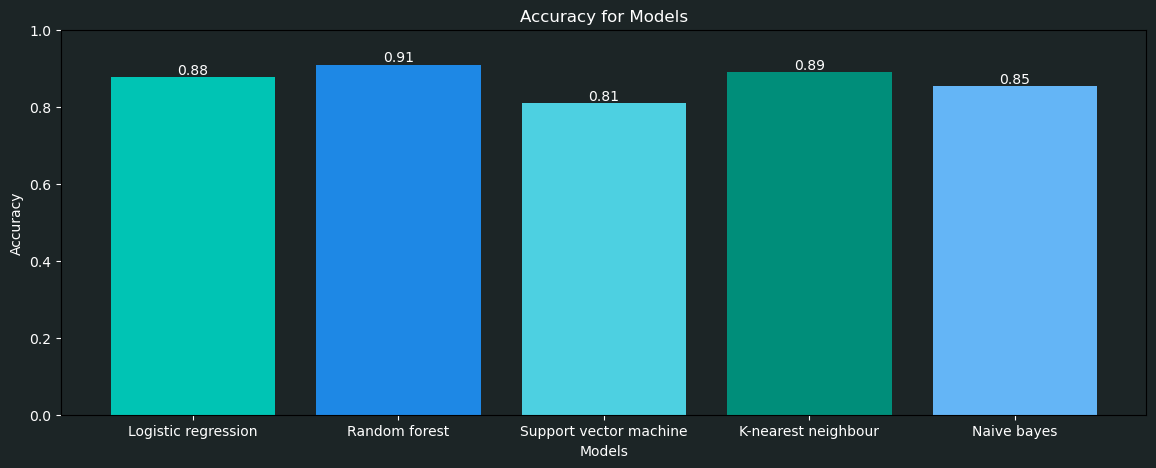

In [507]:
plt.show(Evaluation_metric('Accuracy',accuracy_score))

The accuracy scores indicate that majority of the models predict a transactions class with at least `85%` correctness, apart from Support Vector Machine. This model only achieved `81%` correctness. Random forest and k-nearest neighbours have the best performance of `91%` and `89%`, respectively. Therefore suggesting that they classify transactions with the highest level of correctness.


### *8.2 F1 Score*

The F1 scores for the testing data are visualised below for all the models. This indicates the models ability to balance false flags and detecting fraudulent transactions. A high score signifies a model that can detect as many fraudulent transactions as possible, without falsly flagging legitimate ones. This is desired as it will limit the impedence of legitimate transactions performed by customers.

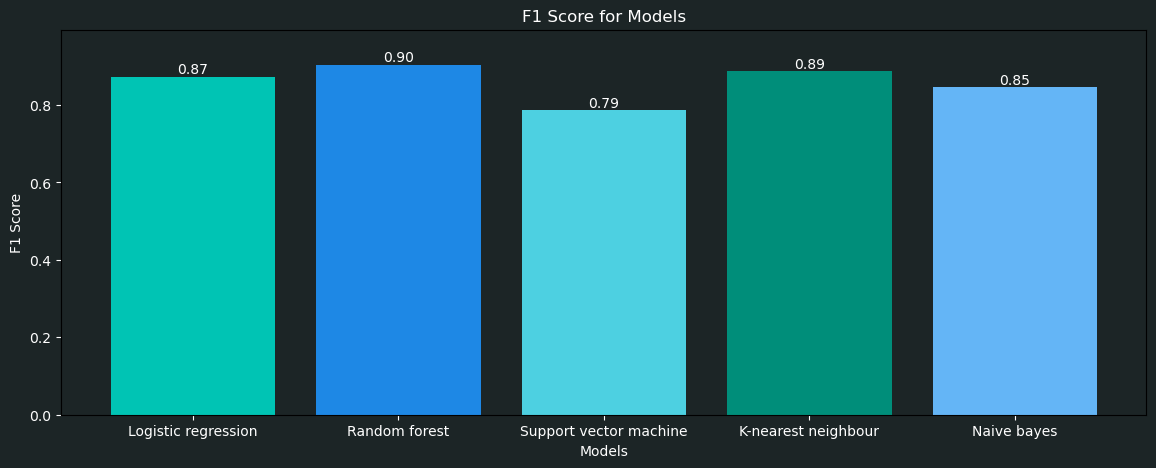

In [509]:
plt.show(Evaluation_metric('F1 Score',f1_score))

The plot exhibts the same pattern as the accuracy plot, with Support vector machine gaining the lowest score amongst the models. Random Forest is the best scoring model once more, with a score of `90%`. Like before, it is closely followed by k-nearest neighbour, scoring `89%`. This indicates that the two model are the best at balancing the likelihood of false flags and detecting fraudulent cases. While support vector machine excecutes this poorly, either due to producing a lot of false flags or faulure of detecting most fradulent transactions.

### *8.3 Recall*

The recall scores of the models are displayed below. This indicates the model's ability to correctly identify fraudulent transactions from legitimate one. A model that can perform this proficiently is desired.

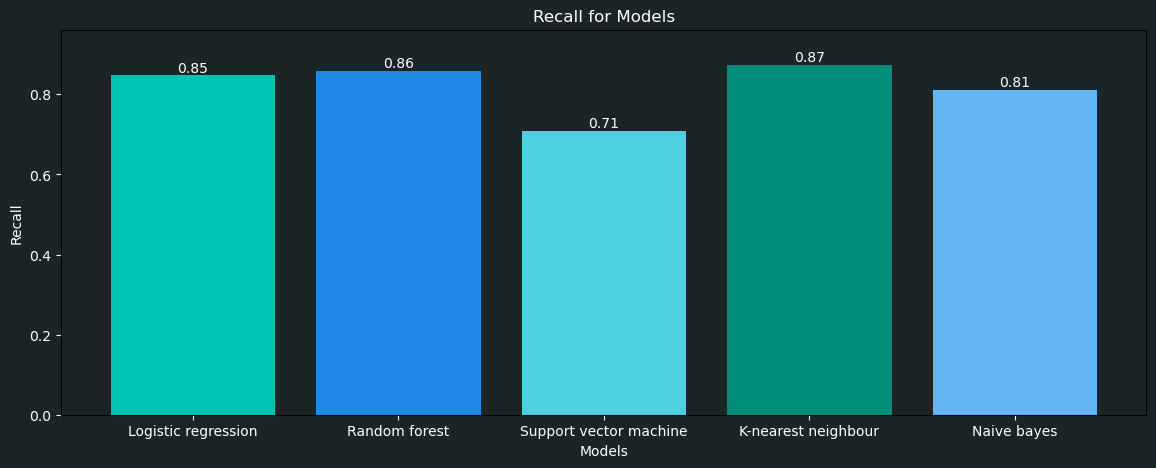

In [511]:
plt.show(Evaluation_metric('Recall',recall_score))

Support Vector machine and Naive Bayes models are the worst performing models, out of the all the models. They only gained a recall score of `71%` and `81%` respectively. The best performing models are again k-nearest neighbour and Random Forest. Although k-nearest neighbour surpassed Random Forest with 1%, acheiving a score of `87%`. The pattern suggests that Random forest and k-nearest neighbour, are excellent at detecting fraudulent transactions, whilst Support vector machine struggles on this part.

### *8.3 Best model*

The best model is determined by comparing the F1 scores of all the models and selecting the model with the highest score. The code below applies the function that executes this comparison and return the final model for fraud detection.

In [455]:
#Apply best model function to extract final model
final_model_name, final_model_pred, final_model = best_model()
print('The Final Models is: ', final_model_name)

The Final Models is:  Random forest


The Final model is found to be `Random Forest`.

---
<a href=#eight></a>
## **9. Final Model**
<a href=#cont>Back to Table of Contents</a>

The final model was determined in the preceeding section to be Random Forest. This was determined by comparing the F1 scores of all the models against each other, based on predictions casted for the test dataset, and ultimately selecting the model with the highest score. The model has variety of charateristicts that we would like to explore, to better understand its efficacy and inner workings. In this section, we investigate the model's characteristics and performance by looking at the feature importance, confusion matrix and its classification report.

---


### *9.1 Important Features*

Diving in to the evaluation of the Random forest model as the final model, a list of important features in generated. The aim is to identify which features play the largest role at identifying fraudlent transaction from legitimate ones. The feaure importance is extrated below from the model object and store in a DataFrame. This DataFrame is then used to plot a bar chart indicating the top 10 features by order of importance. 

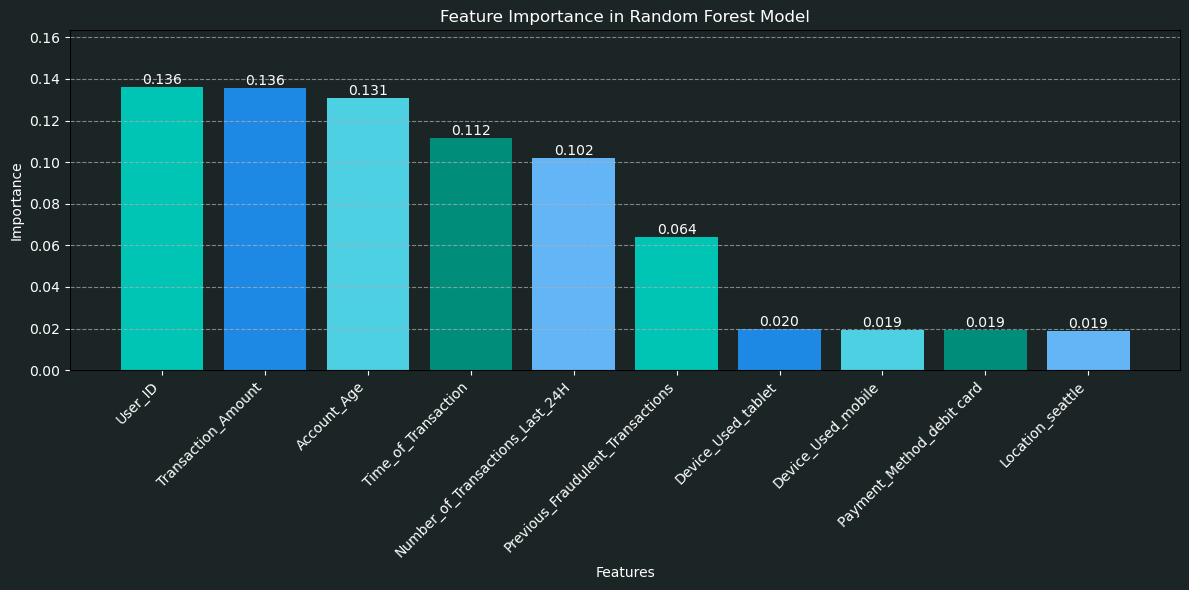

In [513]:
# Get coefficients
feature_importances = final_model.feature_importances_ # For binary classification, coef_ is 2D
feature_names = X_encoded.columns

# Create dataframe
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6),facecolor=background_color)
bars = ax.bar(importance_df['Feature'], importance_df['Importance'], color=colors)

# Add values above each bar
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color=text_color
    )

ax.set_xlabel('Features',color=text_color)
ax.set_ylabel('Importance',color=text_color)
ax.set_title('Feature Importance in Random Forest Model',color=text_color)
ax.set_ylim(0, max(feature_importances) * 1.2)  # Extra space for labels
ax.tick_params(axis='both', colors=text_color)
ax.set_facecolor(background_color)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


From the figure above, we can view the top most important features for the random forest model. User_ID, Transaction_Amount, Account_Age and Time_of_transaction are the most important features accordingly. This suggests that these features are tthe top predictors of whether the transaction is deemed fraudulent or not.1 The top two features, share the same importance score, indicating that they carry the same weight when determining the class for a transaction. The range bewteen the most important and least important feature in the graph is less than `0,11`, demostrating a fairly distributed importance of all the features used to train the model for fraud detection.

### *9.2 Confusion Matrix*

The model's confusion matrix is constructed and dsiplayed below. It maps true positive, false positives, true negatives and as well as false negatives for the two classes. This is executed by crossing the predicted and true lables for the two classes. A diagonal streak is desired when displaying a model, as it indicated the models proficiency at accumulating true positves and true negatives.

<Figure size 800x800 with 0 Axes>

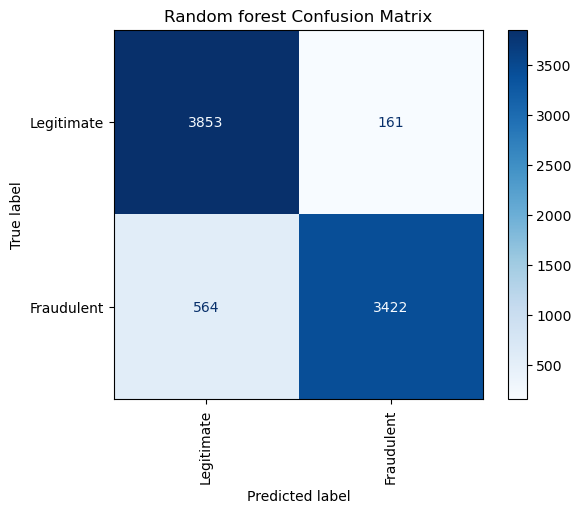

In [517]:
conf_matrix = confusion_matrix(y_test, final_model_pred)
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Legitimate','Fraudulent'])
disp.plot(cmap="Blues", values_format="d")  # 'd' for integer values
plt.xticks(rotation=90)
plt.title(f"{final_model_name} Confusion Matrix")
plt.show()

The confusion matrix indicates that the model correctly lables majority of the data in their correct classes. However, it has a slightly higher tendency of labling some transactions as legitimate whilts they are indeed fraudulent. The fraudulent cases that evade the model make up `7%`, meaning i will fail to recognise fraudulent cases `7%` of the time. This suggest a slight weakness in the model, thus will rely on customers reporting and bring those transactions to the attention of the financial institution for flagging. The model also generates some false alarms `2%` of the time, which indicate an extremely low chance of distubing customers performing legitimate transactions.

### *9.3 Classification Report*

Lastly, the classification report for the model is generated. This reveals the models performance according to the metric precison and recall, along side the f1 score for each class. The weighted average for each metric is also given, along with the model's accuracy. 

In [461]:
print(classification_report(y_test, final_model_pred, target_names=['Legitimate', 'Fraudulent']))

              precision    recall  f1-score   support

  Legitimate       0.87      0.96      0.91      4014
  Fraudulent       0.96      0.86      0.90      3986

    accuracy                           0.91      8000
   macro avg       0.91      0.91      0.91      8000
weighted avg       0.91      0.91      0.91      8000



The classification report indicates that the model performs excellently in all areas. It generated a precision score of `87%` and `96%` for the legitimate and fraudulent class, in that order. This suggests that model generates higher false flags for legitimate cases than fraudulent ones, meaning nearly all of the transactions that are deemed fraudulent are infact fradulent. Accompanying this, a recall score of `96%` and `86%` is noted for the classes. This signifies the models increased ability to correctly sort transactions in their respective classes, althought it is much better at clssifying the legitimate class over the fraudulent one. This fault could be attributed to the large similarity between the fraudulent cases and the legitimate ones in the training data. On average, the model achieved a score of `91%` for all observed performace metrics, meaning it is a suiitable and robust model for fraud detection. 

---
<a href=#nine></a>
## **10. Conclusion and Recommendations**
<a href=#cont>Back to Table of Contents</a>

---


### *10.1 Conclusion*

The project aimed to create a robust model that can detect fraudulent transactions with significant accuracy. A dataset retrieved from Kaggle was used to train a variety of machine learining models. An exploratory analysis was conducted on the dataet and reveal an anual loss of above `$7.5 million`. On average, the amount of loss was seen to be `$363 K` per hour. The greatest loss was seen for the hours of 11 AM and 5 PM. Much more of the losses were related to the payment method, transaction type, device used and more features.

Ultimately, the dataset was used to train 5 differnt models that were optimised through GridSearch and cross validation. After vigorous training, the best model was found to be Random forest model with and accuracy of 91% and an f1 score of 86%. However, fraudulent transactions evade the model 7% of the time and falsely flagged transactions 2% of the time. The top most indicators for fraudulent transactions for the model came to be User_ID , Transaction_Amount, Account_Age and Time_of_Transaction. In conclusion, the model efficiently detects fraudulent transactions based on transaction characteristics.

### *10.2 Recommendations*

- Expand the dataset to include the date of transactions. This will enable further analysis of fraud numbers and loss on a yearly and monthly basis.
- Train the model on a larger dataset to ensure that it can handle large transactionl data
- Improve model performance to reduce the amount fradulent transactions evade the model to atleast 2%

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

---

1. Kanade, V. (2021). What Is Fraud Detection? Definition, Types, Applications, and Best Practices. [online] Spiceworks. Available at: https://www.spiceworks.com/it-security/vulnerability-management/articles/what-is-fraud-detection/.
2. MANDAL, R. (2025). Fraud Detection Dataset. [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/ranjitmandal/fraud-detection-dataset-csv [Accessed 18 Mar. 2025].